<a href="https://colab.research.google.com/github/noushadkhan01/Projects/blob/master/Machine-Learning/Data-Visualization-with-Seaborn/titanic%20data%20visualsation%20with%20seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
df = sns.load_dataset('titanic')

In [0]:
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [0]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [0]:
df = df.loc[:, :'fare']
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833


In [0]:
df.isnull().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

# 1. distplot():-
it will not work on NaN values so first drop nan values or fill them

In [0]:
x = df[['age']]
x.head(2)

,age
0,22.0
1,38.0


In [0]:
x.shape

(891, 1)

In [0]:
x = x.dropna()
x.shape

(714, 1)

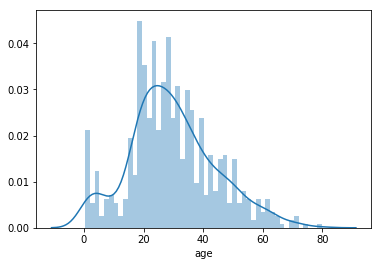

In [0]:
'''{hist, kde, rug, fit}_kws : dictionaries, optional
    Keyword arguments for underlying plotting functions.'''

sns.distplot(x['age'], bins = 50, label = 'age density')
plt.show()

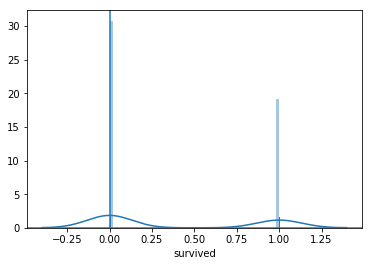

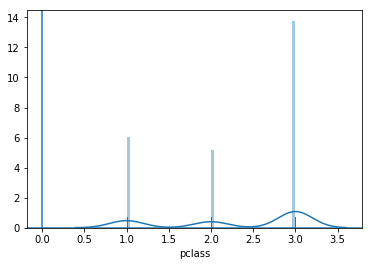

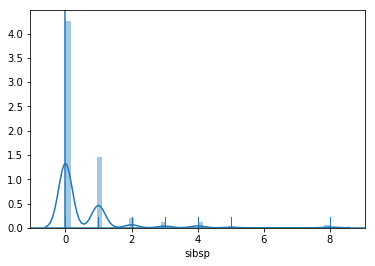

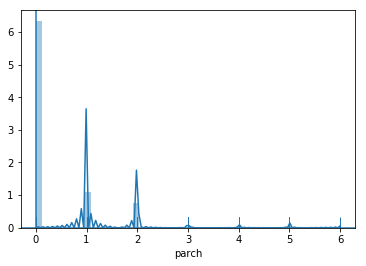

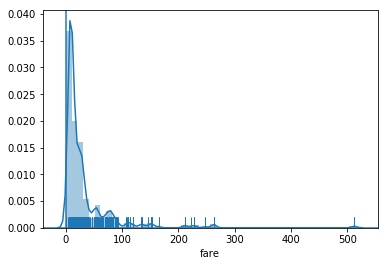

In [0]:
l = ['survived', 'pclass', 'sibsp', 'parch', 'fare']
for i in l:
    sns.distplot(df[i], bins = 50, rug = True)
    plt.axvline()
    plt.axhline()
    plt.show()

# 2. jointplot()

In [0]:
import pandas as pd

In [0]:
df = pd.concat([df.drop(['sex'], axis = 1), pd.get_dummies(df.sex, drop_first = True)], axis = 1)
df.head(2)

,survived,pclass,age,sibsp,parch,fare,male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0


In [0]:
c = df.columns
c

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'male'], dtype='object')

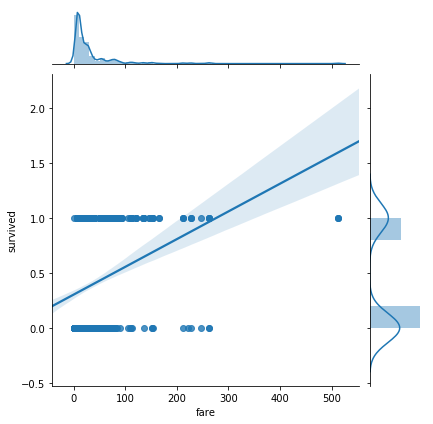

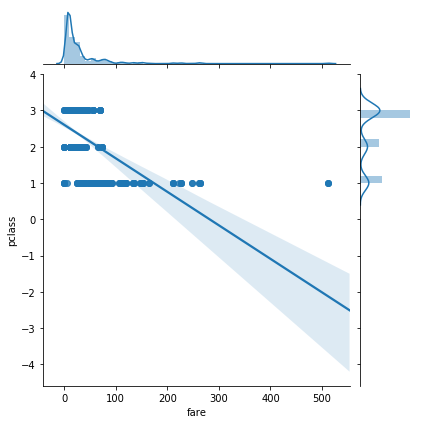

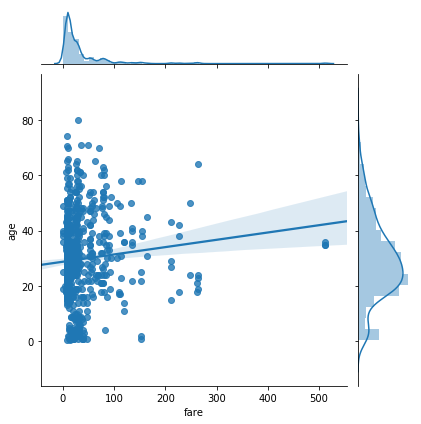

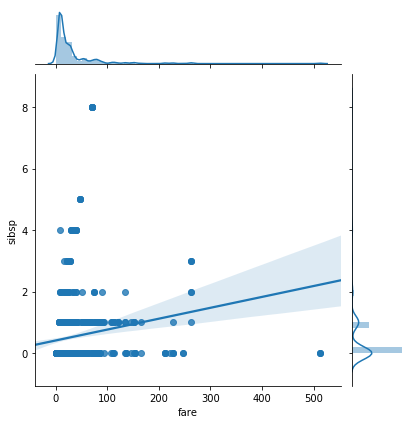

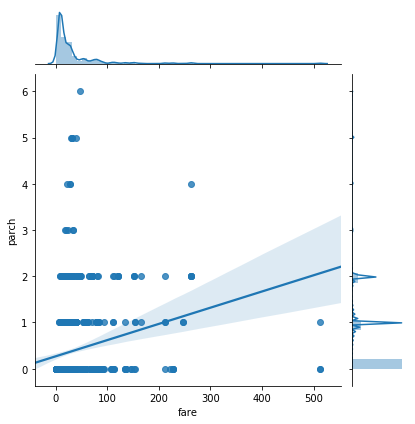

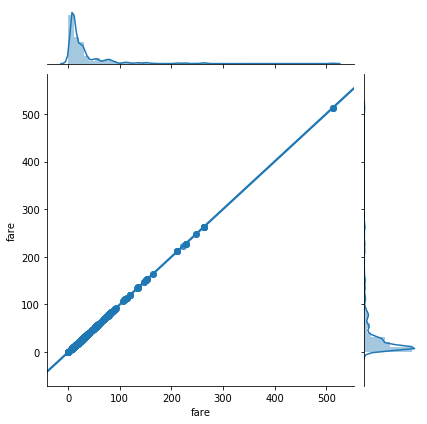

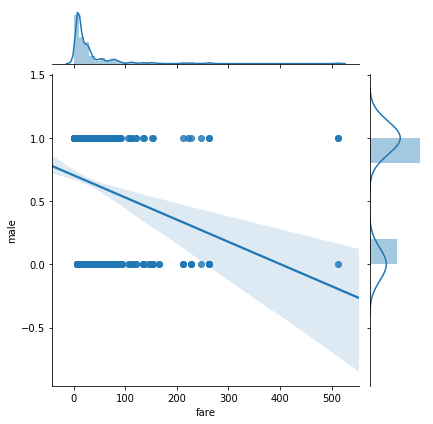

In [0]:
c = df.columns
for i in c:
    sns.jointplot(df.fare, df[i], kind = 'reg')

In [0]:
from scipy.stats import linregress

## Best fit line's bw variables:--

In [0]:
m, b, r, p, std = linregress(df.dropna().pclass, df.dropna().age)
m, b

(-6.398522642453592, 44.01065918767281)

In [0]:
df2 = df.dropna()[df.dropna().age < 78]
df2.head(2)

,survived,pclass,age,sibsp,parch,fare,male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0


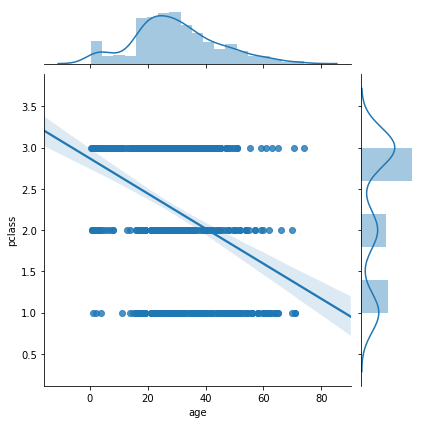

In [0]:
sns.jointplot(x = 'age', y = 'pclass', data = df2, kind = 'reg')

In [0]:
m2, b2, p, r, std = linregress(df2.pclass, df2.age)
m2, b2

(-6.293421880265068, 43.71594855666626)

### kind = 'resid'

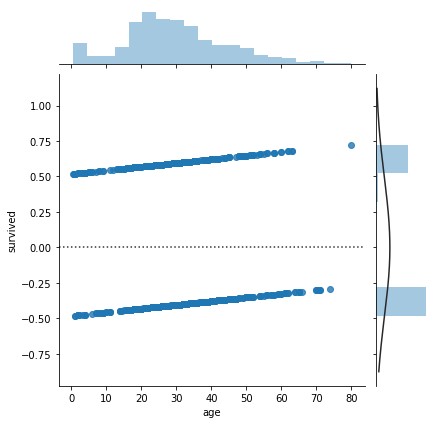

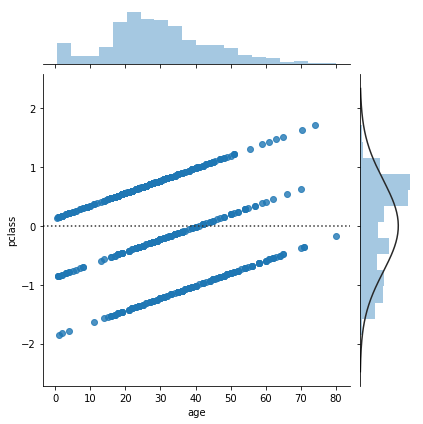

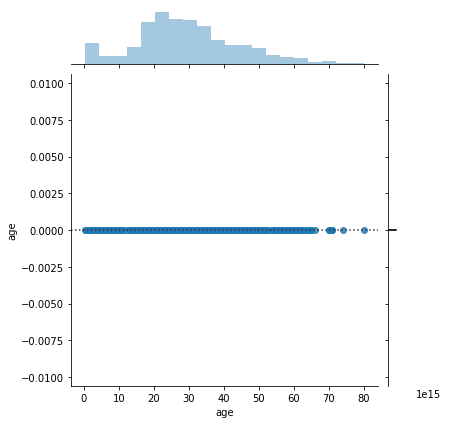

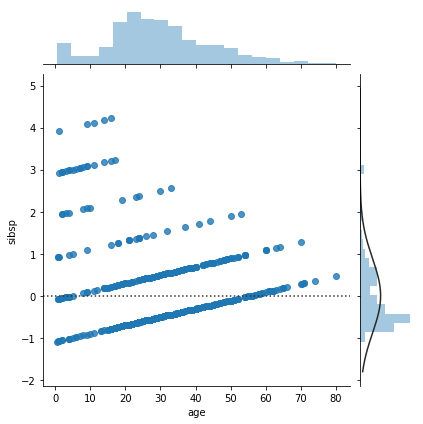

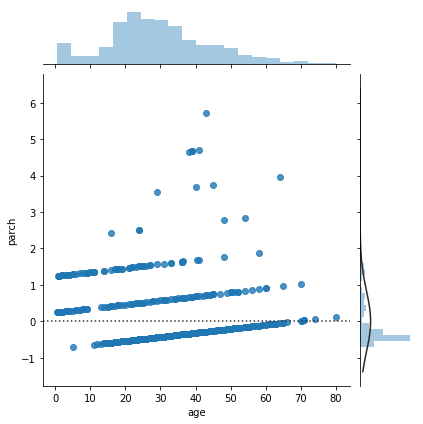

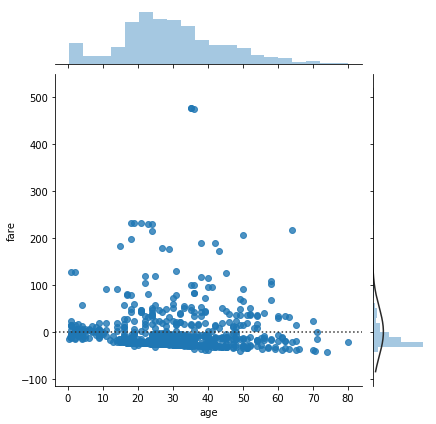

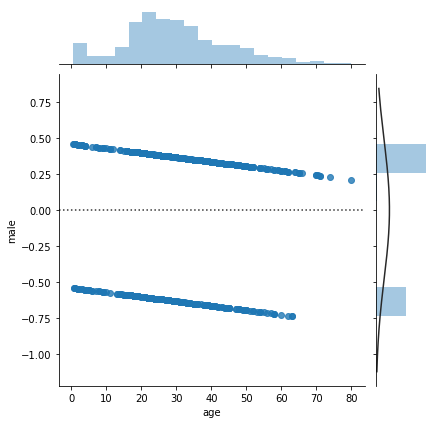

In [0]:
for i in c:
    sns.jointplot(df.age, df[i], kind = 'resid')

# 3 - pairplot()

In [0]:
df.head(2)

,survived,pclass,age,sibsp,parch,fare,male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0


In [0]:
df2 = df.dropna(axis = 0)
df2.shape

(714, 7)

C:\Users\acer\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\acer\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


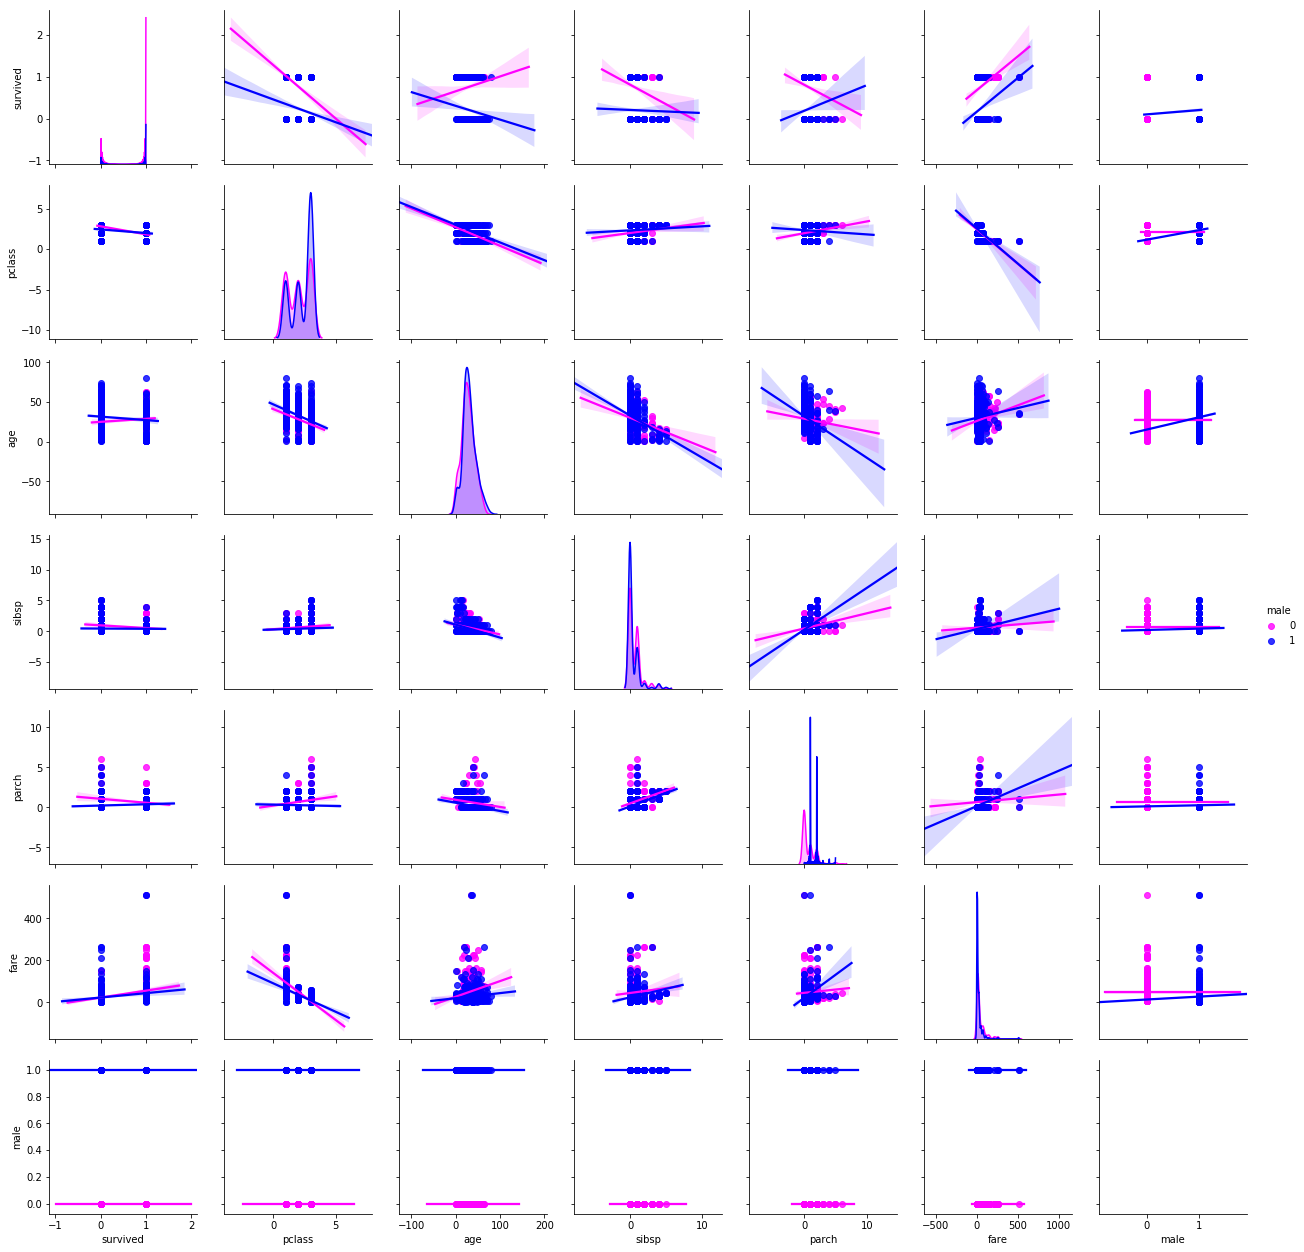

In [0]:
sns.pairplot(df2, hue = 'male', palette = ['magenta', 'blue'], kind = 'reg')


# 4. categorical plot()

## 4.1 - barplot()

In [0]:
df2 = df.copy()
df2.head()

,survived,pclass,age,sibsp,parch,fare,male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


In [0]:
df = sns.load_dataset('titanic')
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [0]:
df = df.loc[:, :'fare']
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833


In [0]:
df.dropna(inplace = True)
df.shape

(714, 7)

In [0]:
c = df.columns
c

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare'], dtype='object')

In [0]:
c = c.tolist()
c

['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']

In [0]:
c.remove('sex')
c

['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']

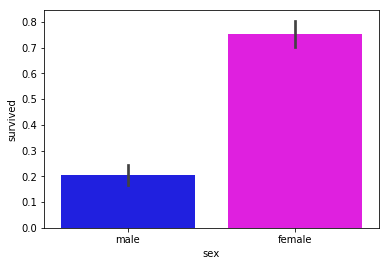

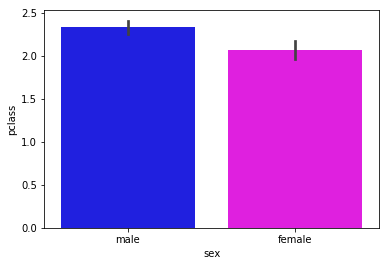

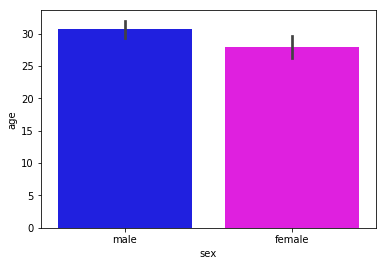

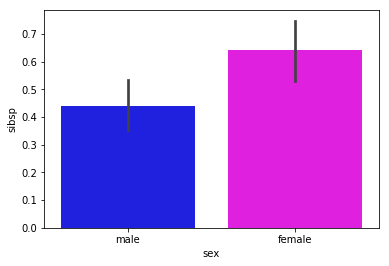

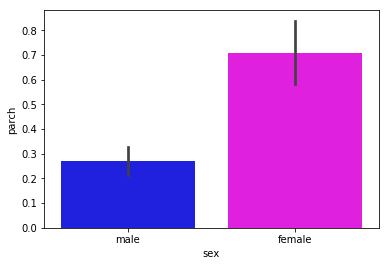

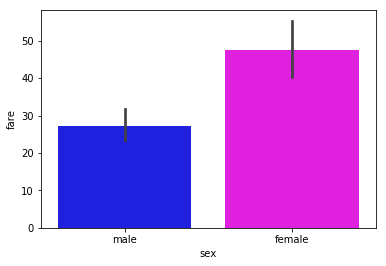

In [0]:
for i in c:
    sns.barplot(x = 'sex', y = i, data = df, palette = ['blue', 'magenta'])
    plt.show()

## 4.2 - countplot()

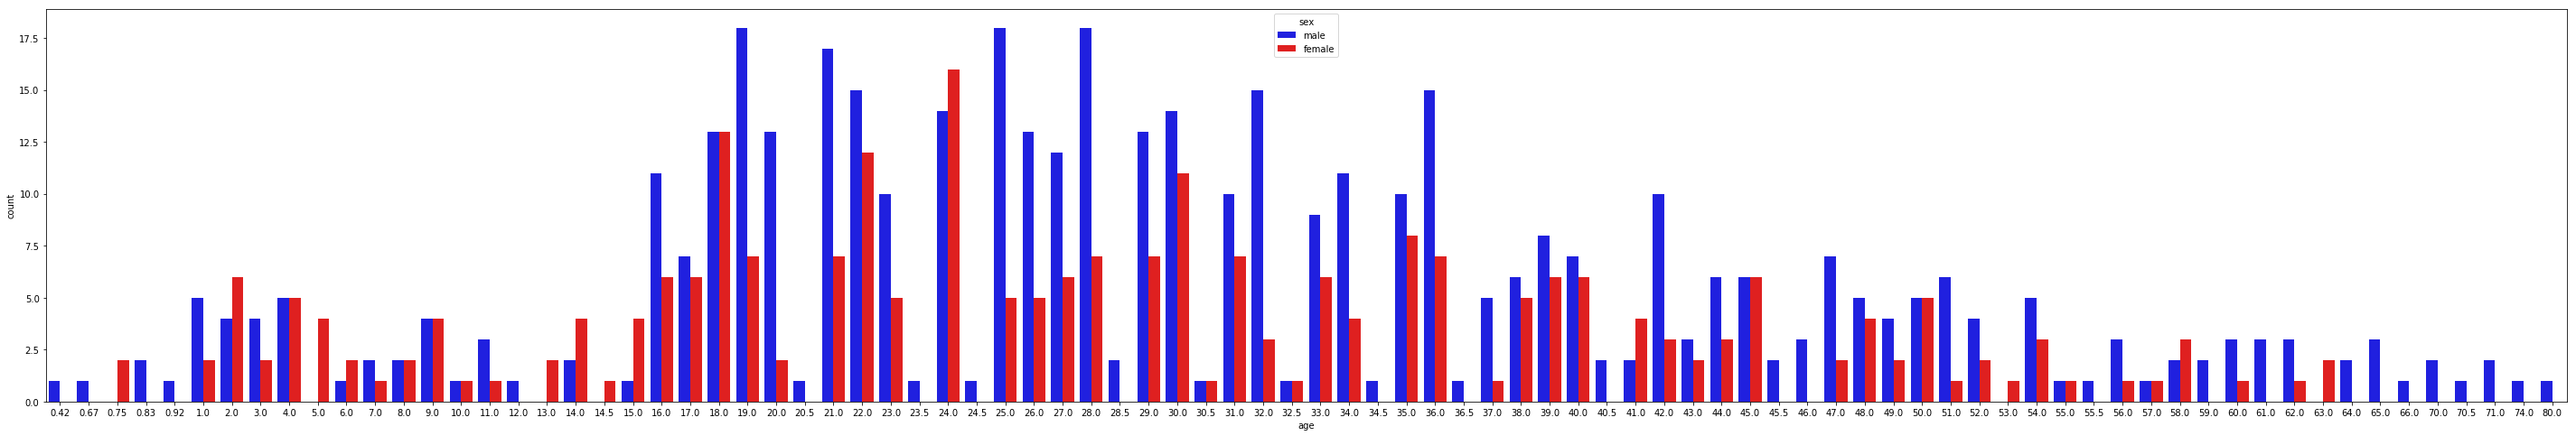

In [0]:
plt.figure(figsize = (50, 8))
sns.countplot(x = 'age', hue = 'sex', data = df, palette = ['blue', 'red'])

In [0]:
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833


In [0]:
df3 = df[df.sex == 'female']
df3.head(2)

,survived,pclass,sex,age,sibsp,parch,fare
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250


In [0]:
df3.shape

(261, 7)

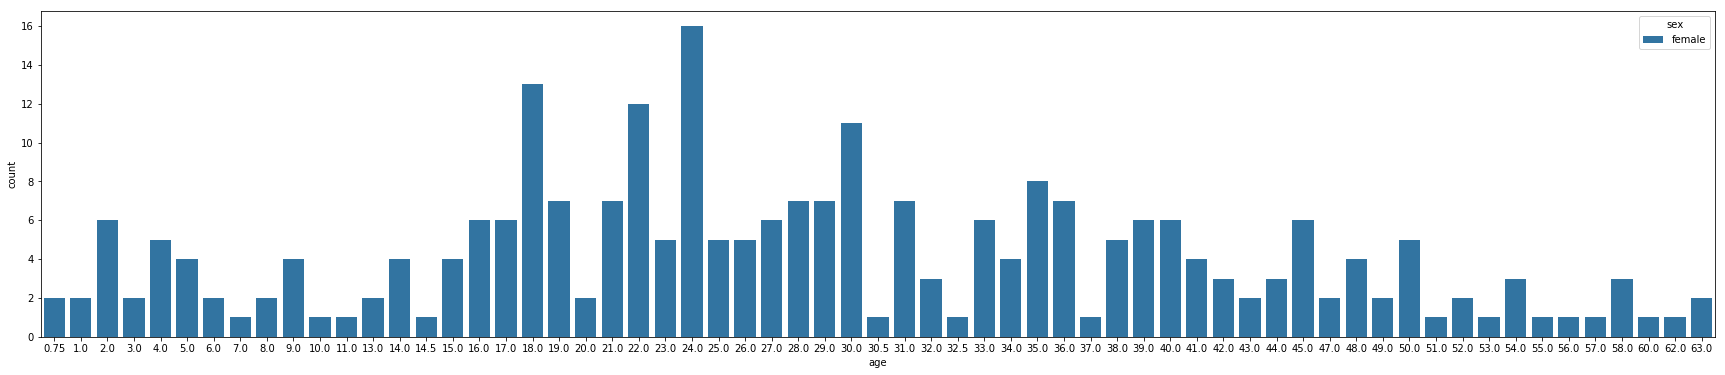

In [0]:
plt.figure(figsize = (30, 6))
sns.countplot(x = 'age', hue = 'sex', data = df3)

In [0]:
df3.age.describe()

count    261.000000
mean      27.915709
std       14.110146
min        0.750000
25%       18.000000
50%       27.000000
75%       37.000000
max       63.000000
Name: age, dtype: float64

In [0]:
df3 = df[df.sex == 'male']
df3.shape

(453, 7)

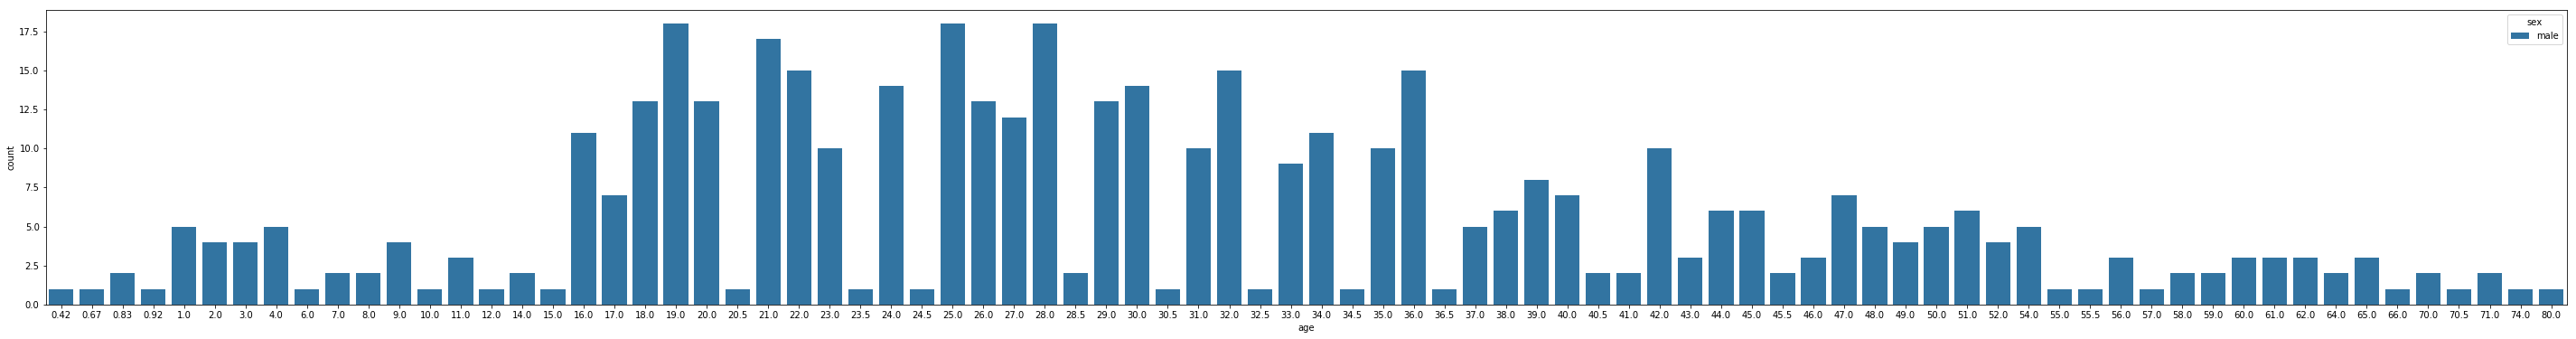

In [0]:
plt.figure(figsize = (50, 6))
sns.countplot(x = 'age', hue = 'sex', data = df3)

In [0]:
df3.age.describe()

count    453.000000
mean      30.726645
std       14.678201
min        0.420000
25%       21.000000
50%       29.000000
75%       39.000000
max       80.000000
Name: age, dtype: float64

In [0]:
df3.age.median()

29.0

## 4.3 boxplot()

In [0]:
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833


In [0]:
c = df.select_dtypes(include = [np.number]).columns
c

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')

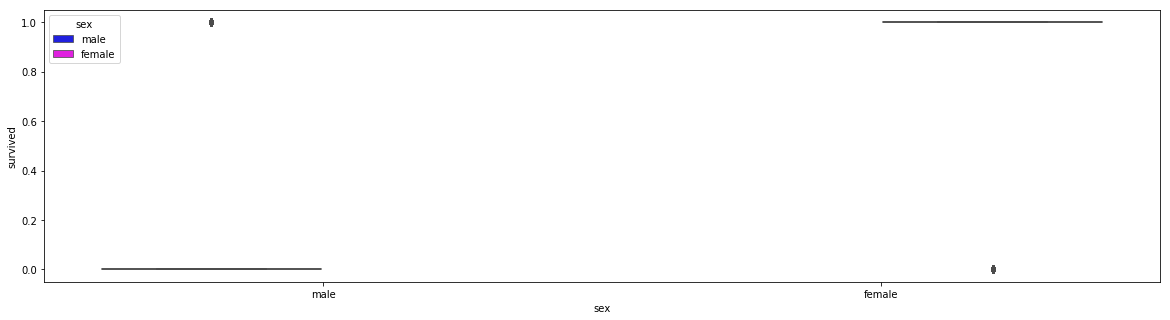

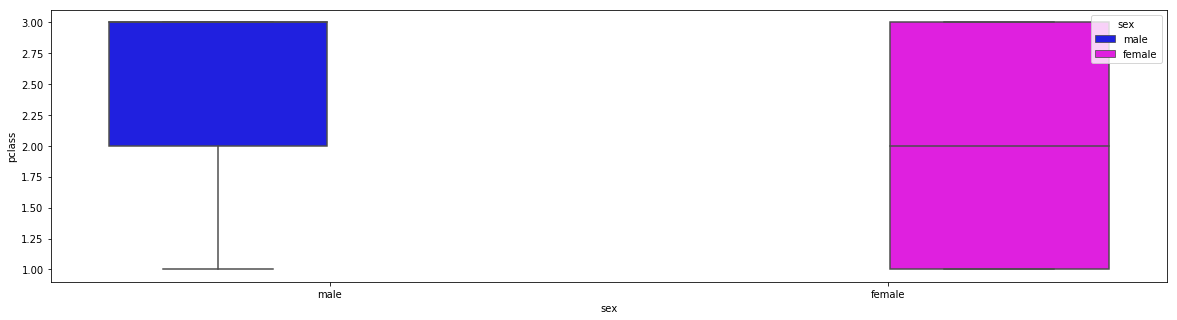

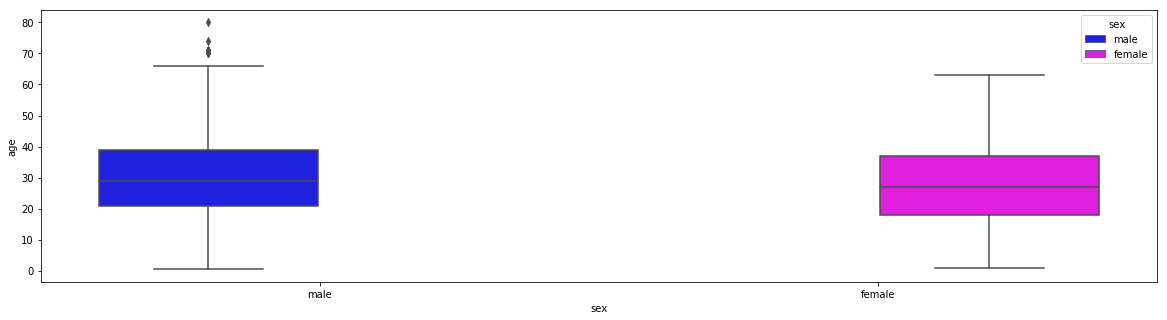

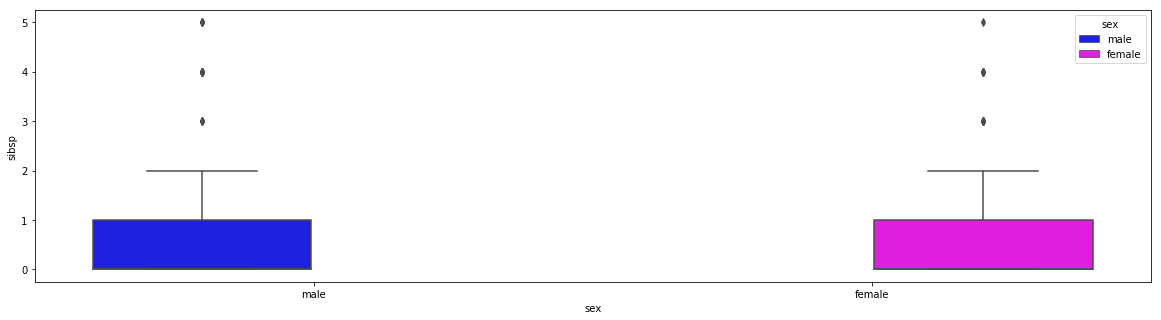

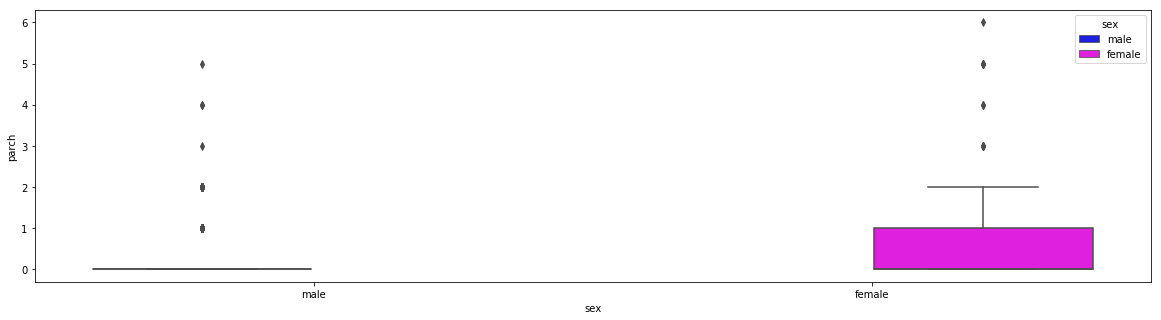

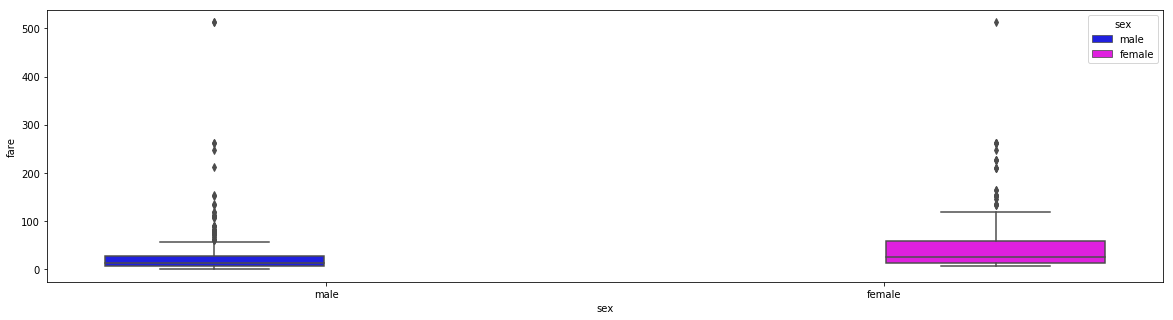

In [0]:
for i in c:
    plt.figure(figsize = (20, 5))
    sns.boxplot(x ='sex', y = i, data = df, hue = 'sex', palette = ['blue', 'magenta'])
    plt.show()

## 4.4 - violinplot()

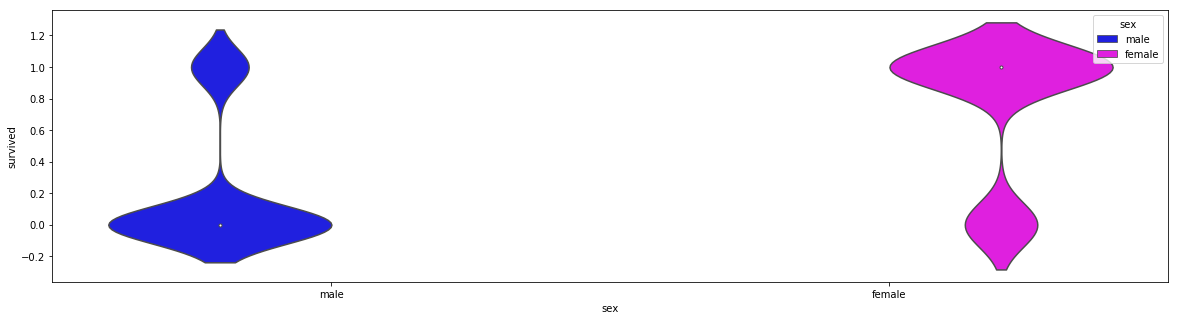

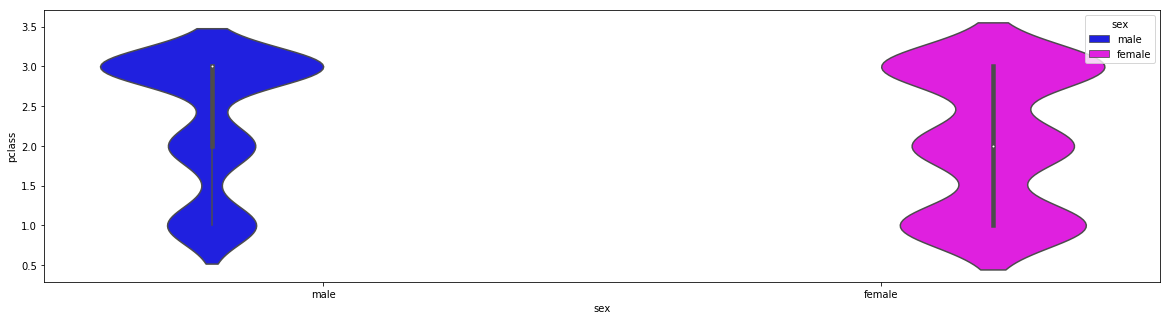

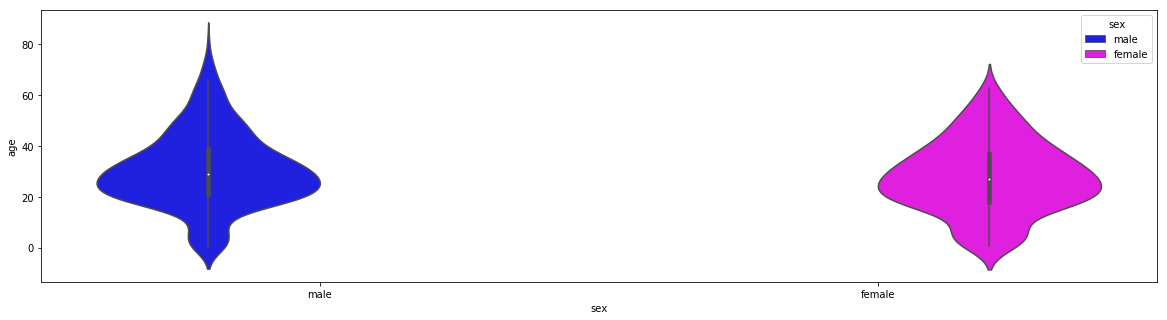

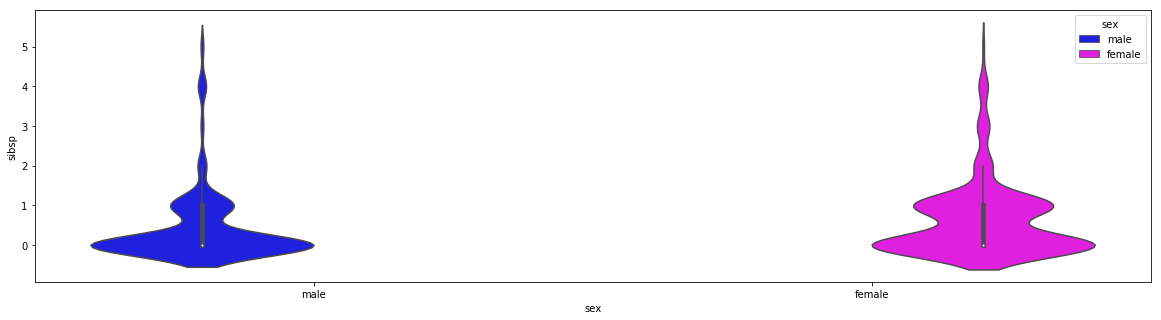

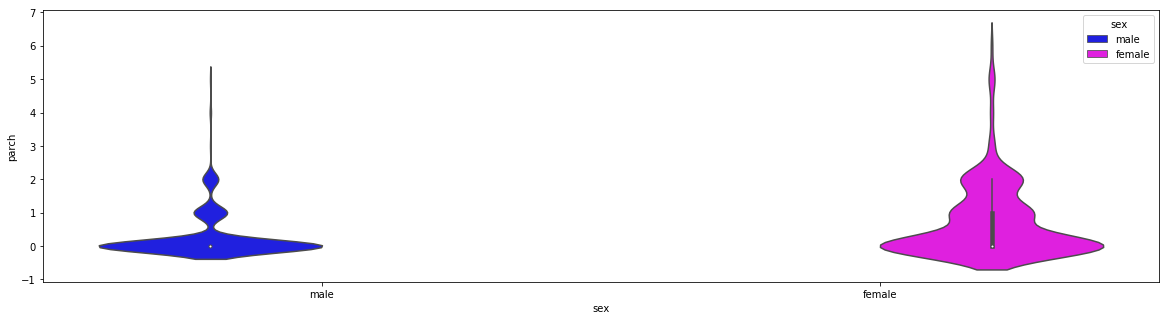

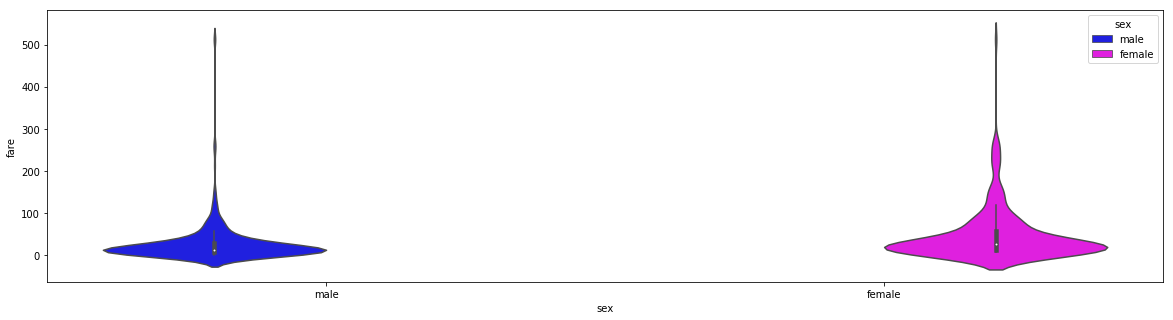

In [0]:
for i in c:
    plt.figure(figsize = (20, 5))
    sns.violinplot(x ='sex', y = i, data = df, hue = 'sex', palette = ['blue', 'magenta'])
    plt.show()

## 4.5 - factorplot()

C:\Users\acer\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


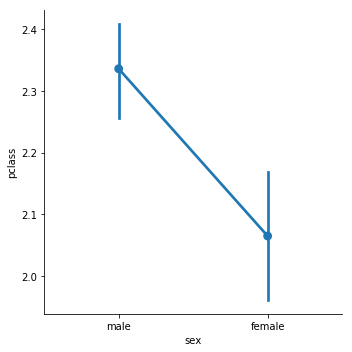

In [0]:
sns.factorplot(x = 'sex', y = 'pclass', data = df, #hue = 'sex'
              )

In [0]:
df.shape

(714, 7)

#### we can't plot factorplot for full df

In [0]:
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833


In [0]:
df.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

In [0]:
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833


In [0]:
x

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare'], dtype='object')

In [0]:
y = list(df.columns)
y

['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']

In [0]:
y.remove('survived')

Kind = point 


 x is survived 
 


<Figure size 2160x432 with 0 Axes>

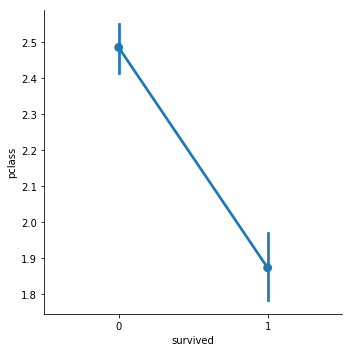

<Figure size 2160x432 with 0 Axes>

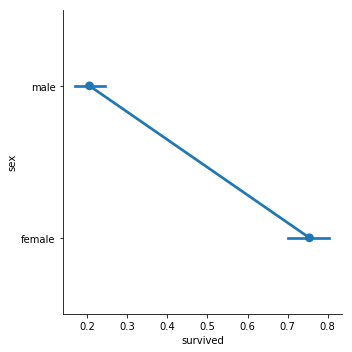

<Figure size 2160x432 with 0 Axes>

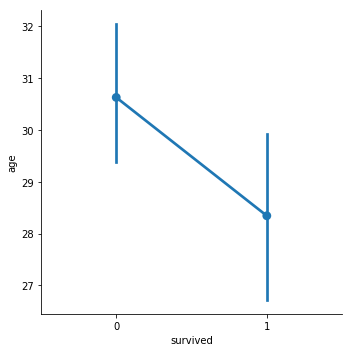

<Figure size 2160x432 with 0 Axes>

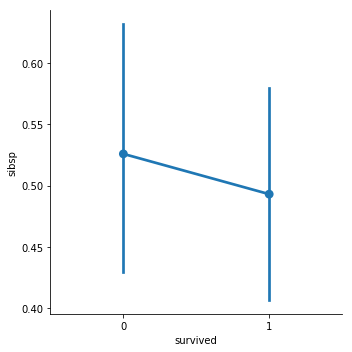

<Figure size 2160x432 with 0 Axes>

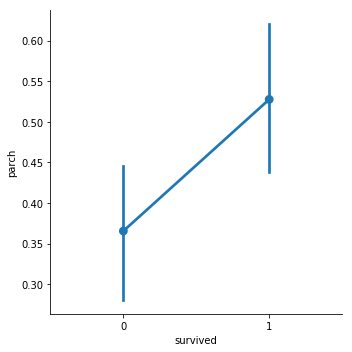

<Figure size 2160x432 with 0 Axes>

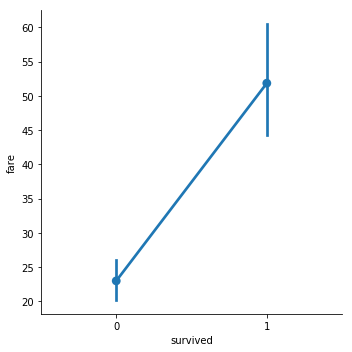


 x is pclass 
 


<Figure size 2160x432 with 0 Axes>

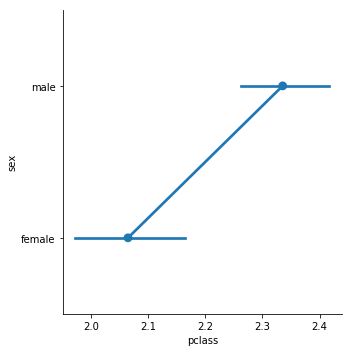

<Figure size 2160x432 with 0 Axes>

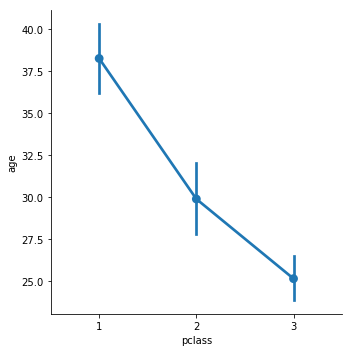

<Figure size 2160x432 with 0 Axes>

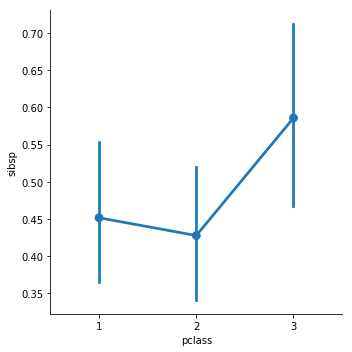

<Figure size 2160x432 with 0 Axes>

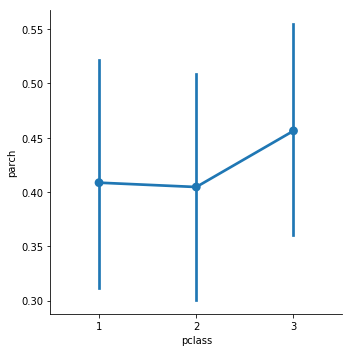

<Figure size 2160x432 with 0 Axes>

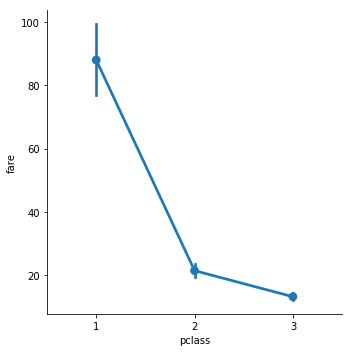


 x is sex 
 


<Figure size 2160x432 with 0 Axes>

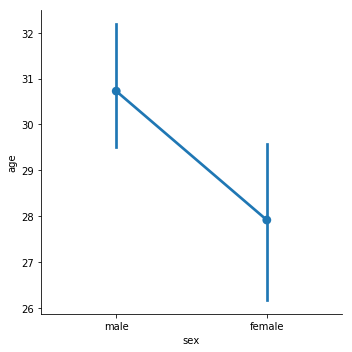

<Figure size 2160x432 with 0 Axes>

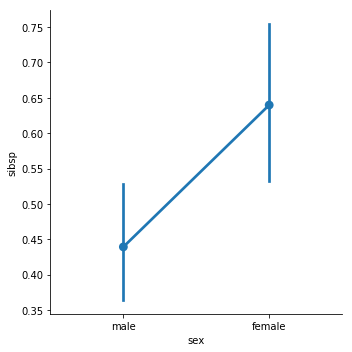

<Figure size 2160x432 with 0 Axes>

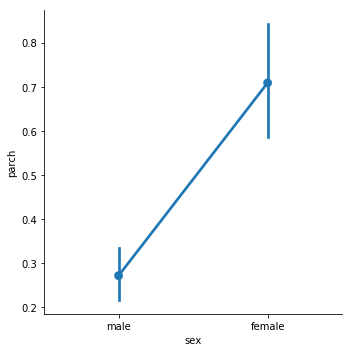

<Figure size 2160x432 with 0 Axes>

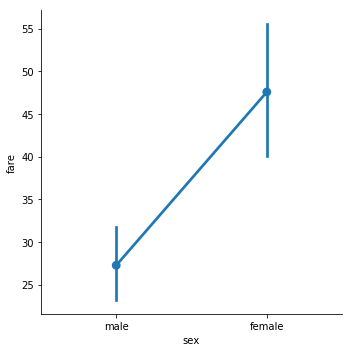


 x is age 
 


<Figure size 2160x432 with 0 Axes>

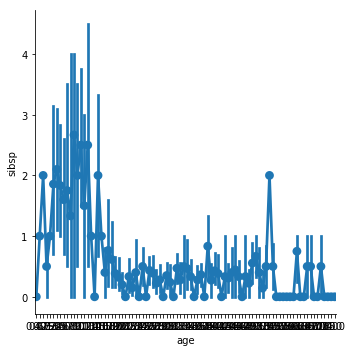

<Figure size 2160x432 with 0 Axes>

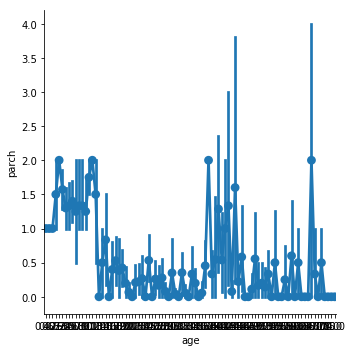

<Figure size 2160x432 with 0 Axes>

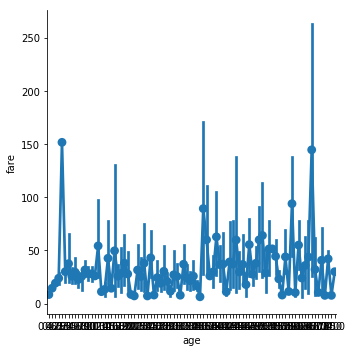


 x is sibsp 
 


<Figure size 2160x432 with 0 Axes>

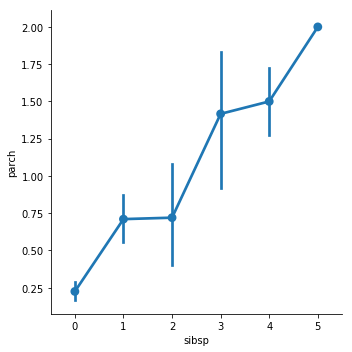

<Figure size 2160x432 with 0 Axes>

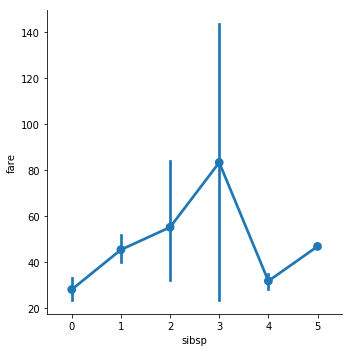


 x is parch 
 


<Figure size 2160x432 with 0 Axes>

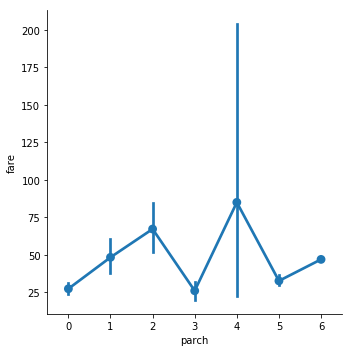


 x is fare 
 
Kind = bar 


 x is survived 
 


<Figure size 2160x432 with 0 Axes>

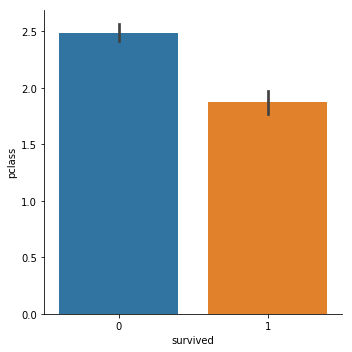

<Figure size 2160x432 with 0 Axes>

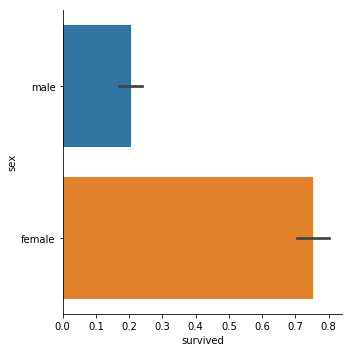

<Figure size 2160x432 with 0 Axes>

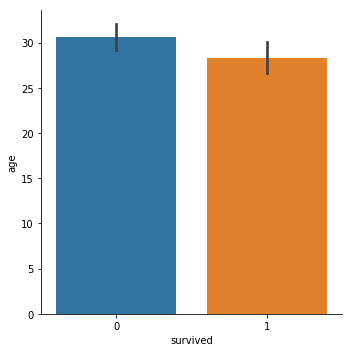

<Figure size 2160x432 with 0 Axes>

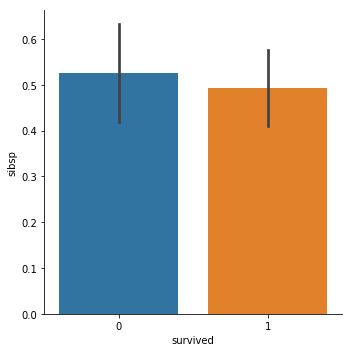

<Figure size 2160x432 with 0 Axes>

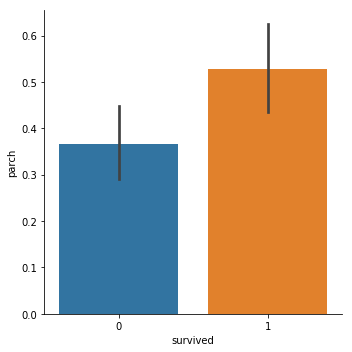

<Figure size 2160x432 with 0 Axes>

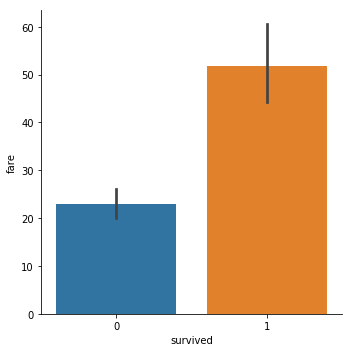


 x is pclass 
 


<Figure size 2160x432 with 0 Axes>

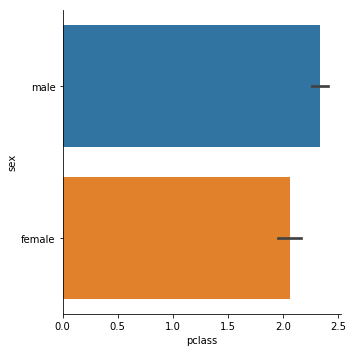

<Figure size 2160x432 with 0 Axes>

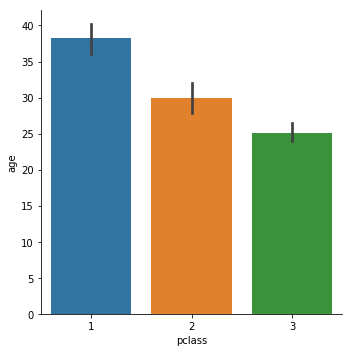

<Figure size 2160x432 with 0 Axes>

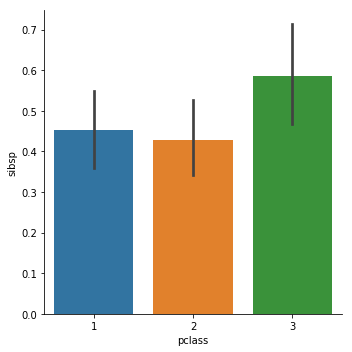

<Figure size 2160x432 with 0 Axes>

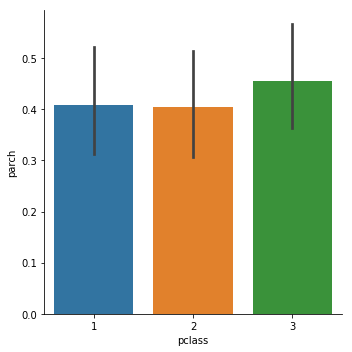

<Figure size 2160x432 with 0 Axes>

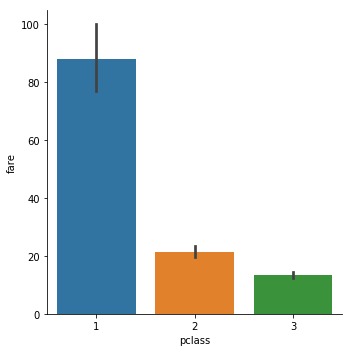


 x is sex 
 


<Figure size 2160x432 with 0 Axes>

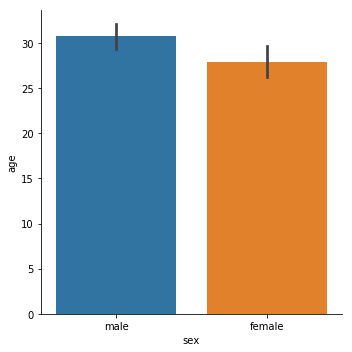

<Figure size 2160x432 with 0 Axes>

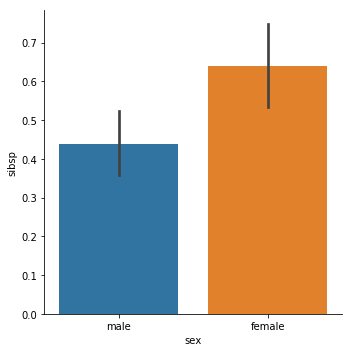

<Figure size 2160x432 with 0 Axes>

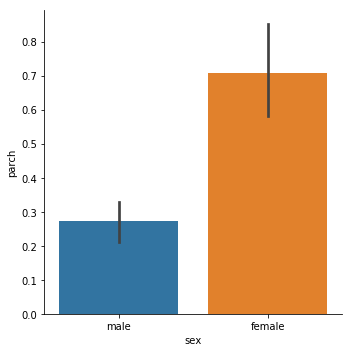

<Figure size 2160x432 with 0 Axes>

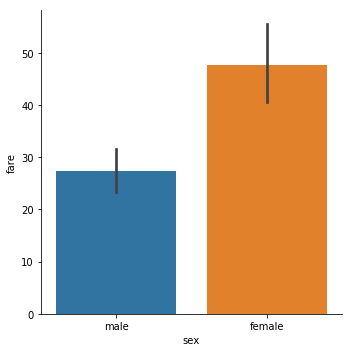


 x is age 
 


<Figure size 2160x432 with 0 Axes>

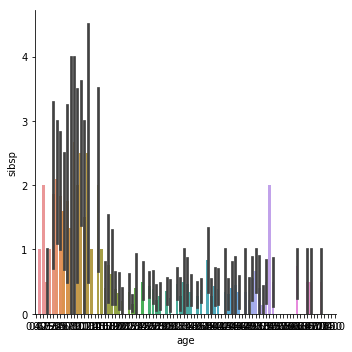

<Figure size 2160x432 with 0 Axes>

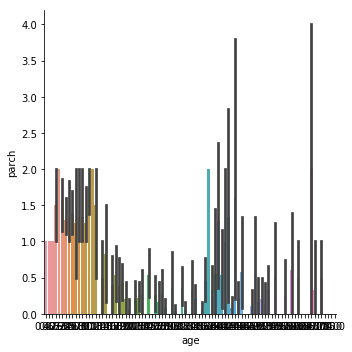

<Figure size 2160x432 with 0 Axes>

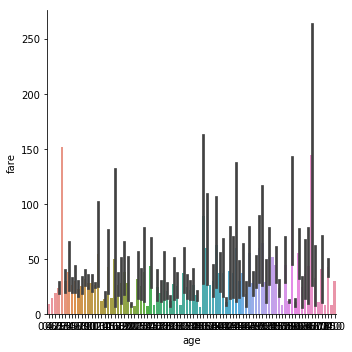


 x is sibsp 
 


<Figure size 2160x432 with 0 Axes>

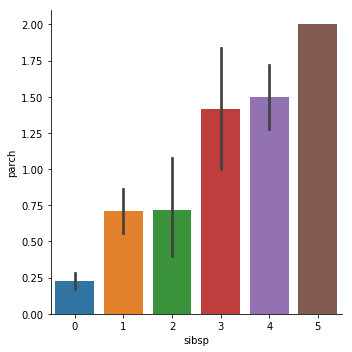

<Figure size 2160x432 with 0 Axes>

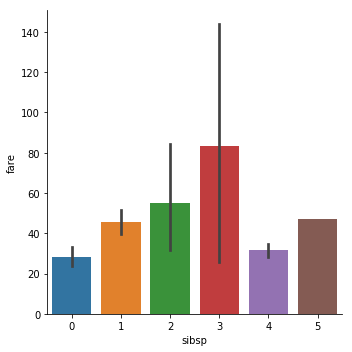


 x is parch 
 


<Figure size 2160x432 with 0 Axes>

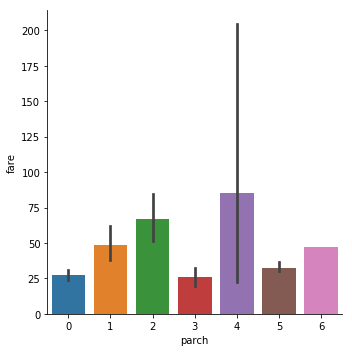


 x is fare 
 
Kind = strip 


 x is survived 
 


<Figure size 2160x432 with 0 Axes>

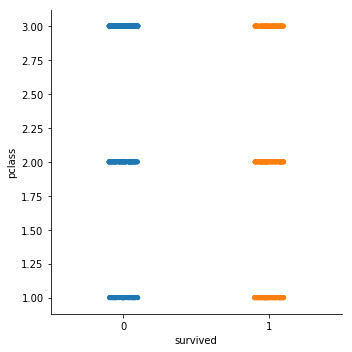

<Figure size 2160x432 with 0 Axes>

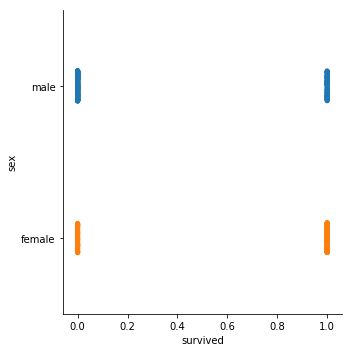

<Figure size 2160x432 with 0 Axes>

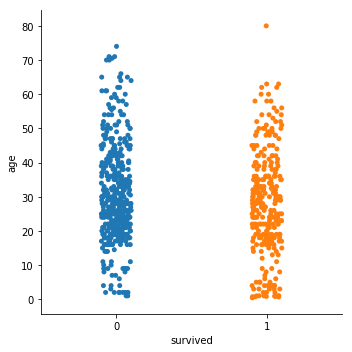

<Figure size 2160x432 with 0 Axes>

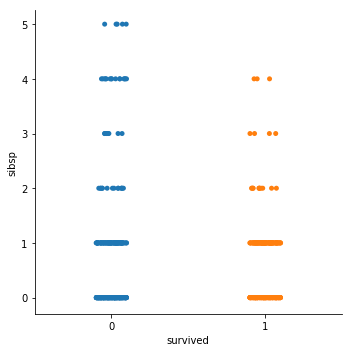

<Figure size 2160x432 with 0 Axes>

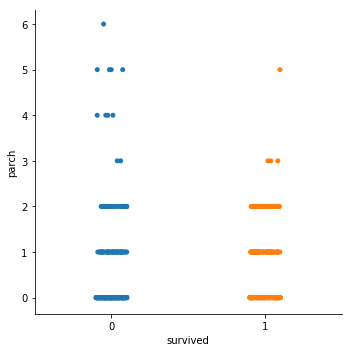

<Figure size 2160x432 with 0 Axes>

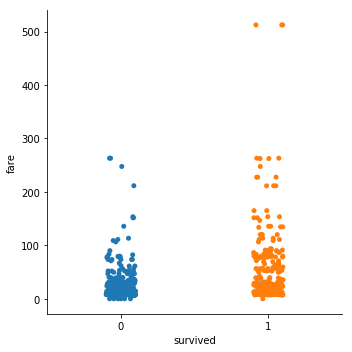


 x is pclass 
 


<Figure size 2160x432 with 0 Axes>

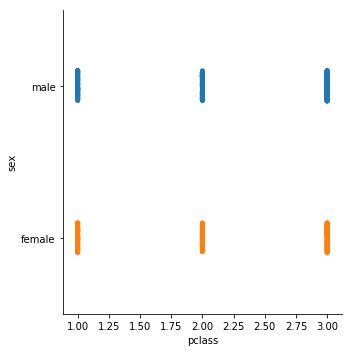

<Figure size 2160x432 with 0 Axes>

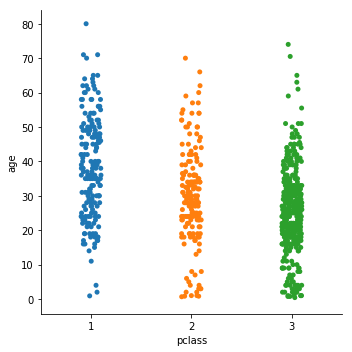

<Figure size 2160x432 with 0 Axes>

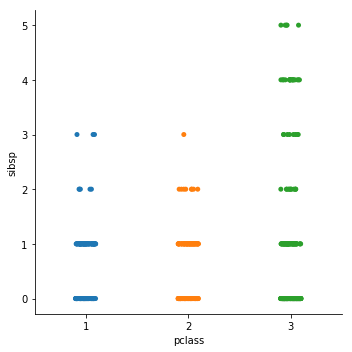

<Figure size 2160x432 with 0 Axes>

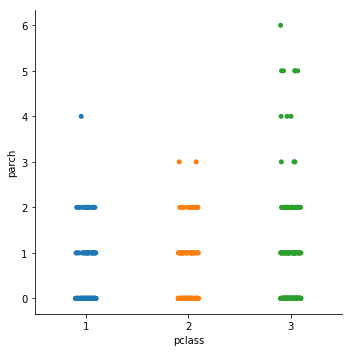

<Figure size 2160x432 with 0 Axes>

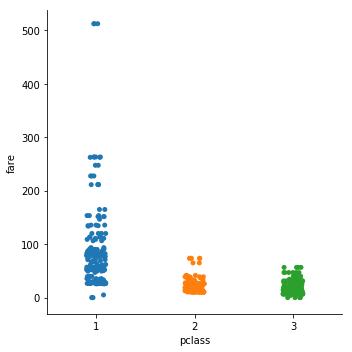


 x is sex 
 


<Figure size 2160x432 with 0 Axes>

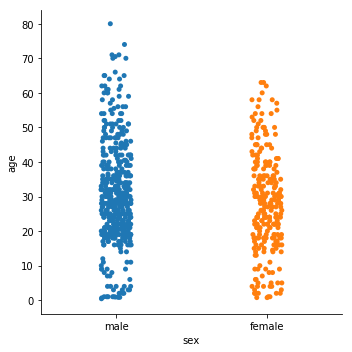

<Figure size 2160x432 with 0 Axes>

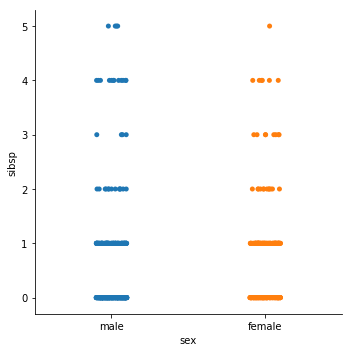

<Figure size 2160x432 with 0 Axes>

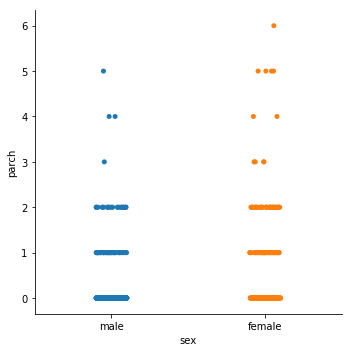

<Figure size 2160x432 with 0 Axes>

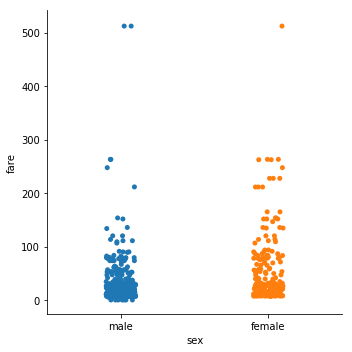


 x is age 
 


<Figure size 2160x432 with 0 Axes>

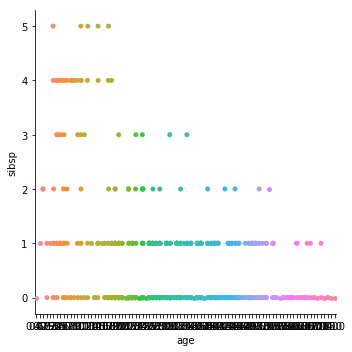

<Figure size 2160x432 with 0 Axes>

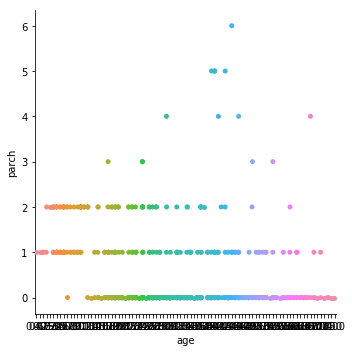

<Figure size 2160x432 with 0 Axes>

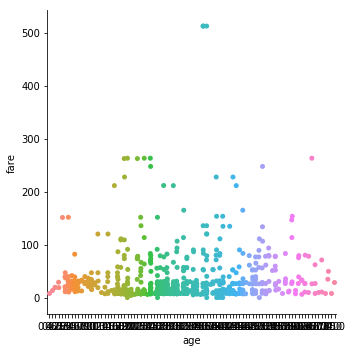


 x is sibsp 
 


<Figure size 2160x432 with 0 Axes>

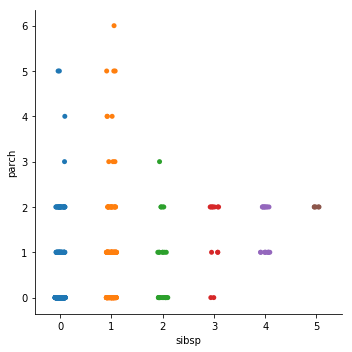

<Figure size 2160x432 with 0 Axes>

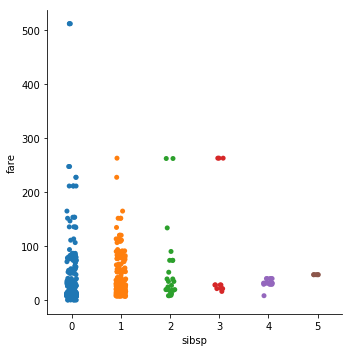


 x is parch 
 


<Figure size 2160x432 with 0 Axes>

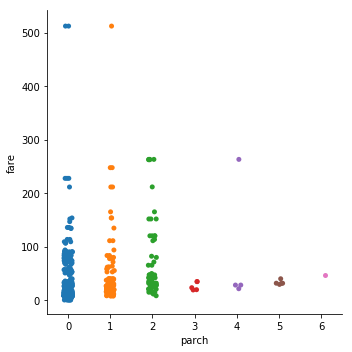


 x is fare 
 
Kind = swarm 


 x is survived 
 


<Figure size 2160x432 with 0 Axes>

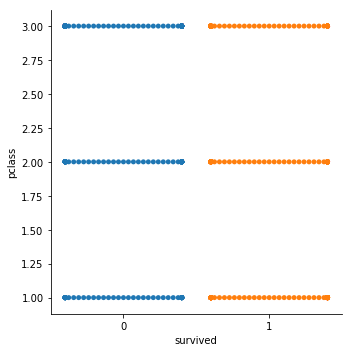

<Figure size 2160x432 with 0 Axes>

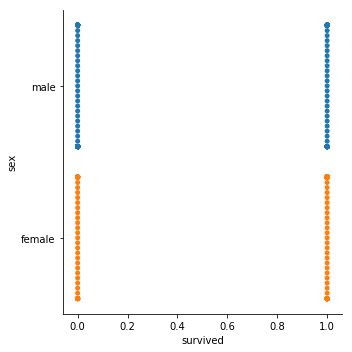

<Figure size 2160x432 with 0 Axes>

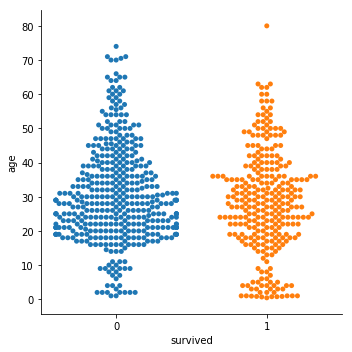

<Figure size 2160x432 with 0 Axes>

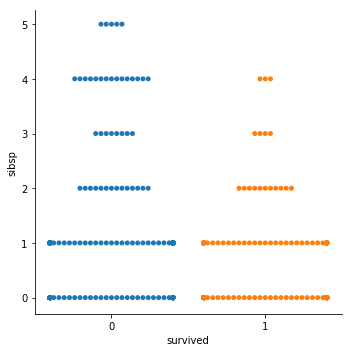

<Figure size 2160x432 with 0 Axes>

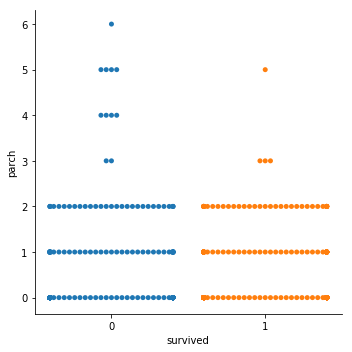

<Figure size 2160x432 with 0 Axes>

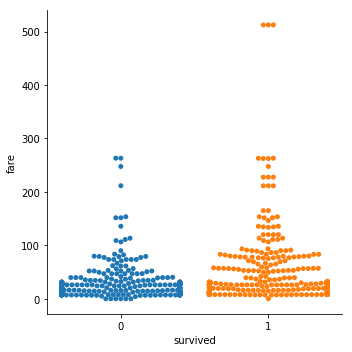


 x is pclass 
 


<Figure size 2160x432 with 0 Axes>

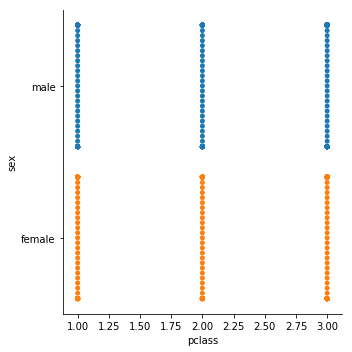

<Figure size 2160x432 with 0 Axes>

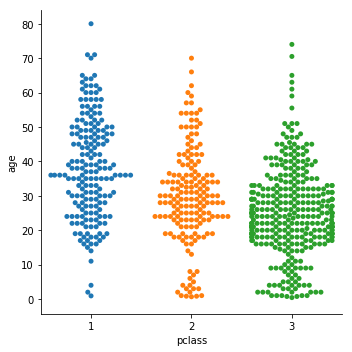

<Figure size 2160x432 with 0 Axes>

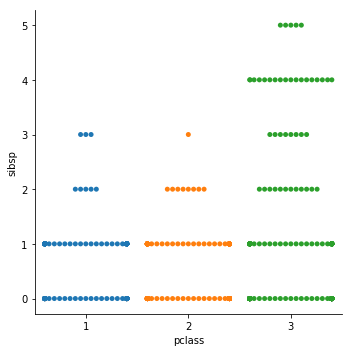

<Figure size 2160x432 with 0 Axes>

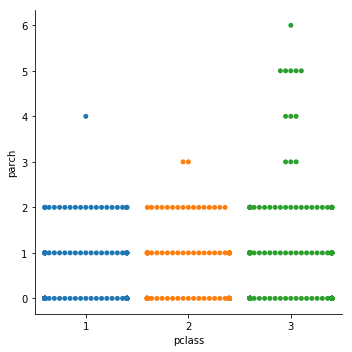

<Figure size 2160x432 with 0 Axes>

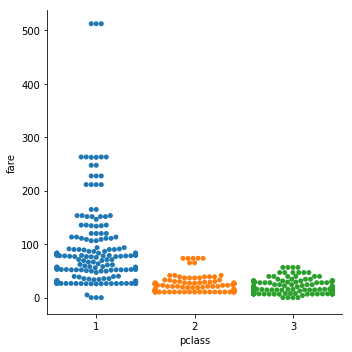


 x is sex 
 


<Figure size 2160x432 with 0 Axes>

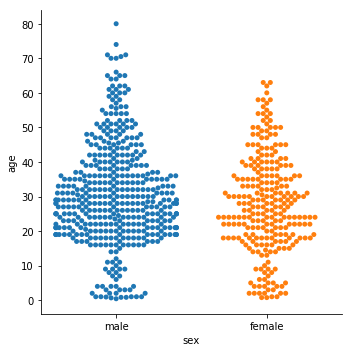

<Figure size 2160x432 with 0 Axes>

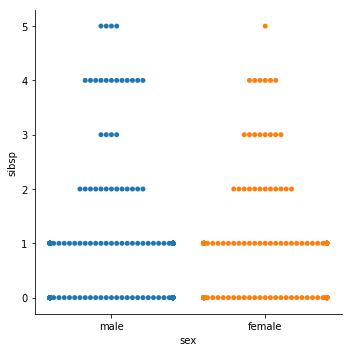

<Figure size 2160x432 with 0 Axes>

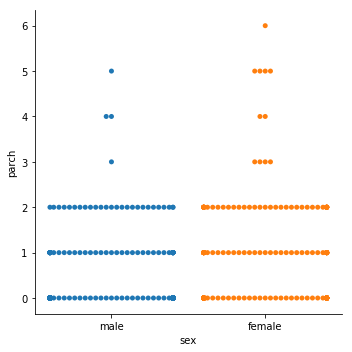

<Figure size 2160x432 with 0 Axes>

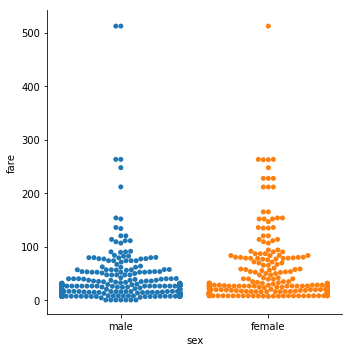


 x is age 
 


<Figure size 2160x432 with 0 Axes>

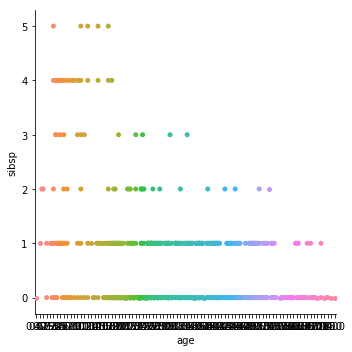

<Figure size 2160x432 with 0 Axes>

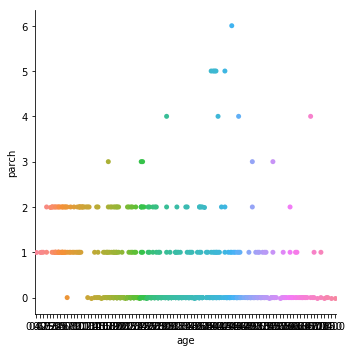

<Figure size 2160x432 with 0 Axes>

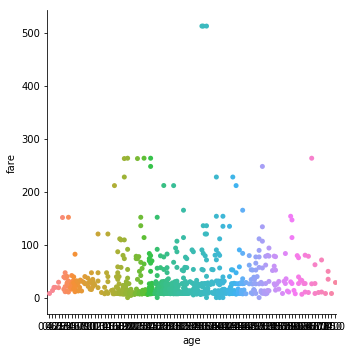


 x is sibsp 
 


<Figure size 2160x432 with 0 Axes>

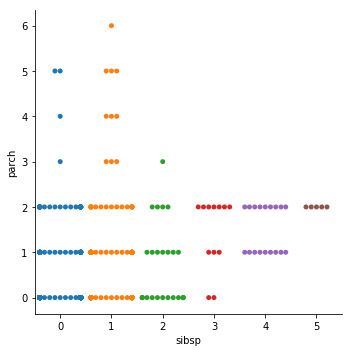

<Figure size 2160x432 with 0 Axes>

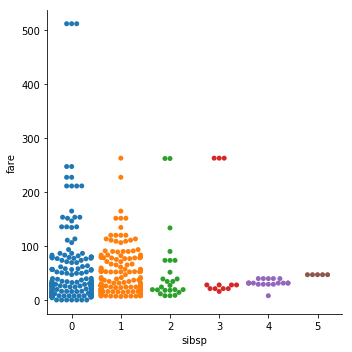


 x is parch 
 


<Figure size 2160x432 with 0 Axes>

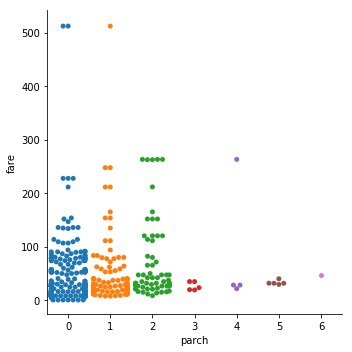


 x is fare 
 
Kind = box 


 x is survived 
 


<Figure size 2160x432 with 0 Axes>

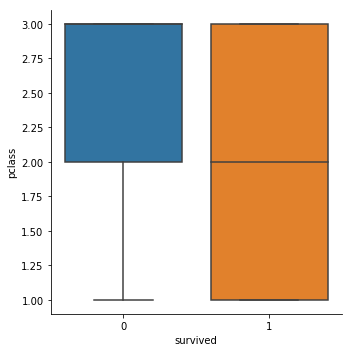

<Figure size 2160x432 with 0 Axes>

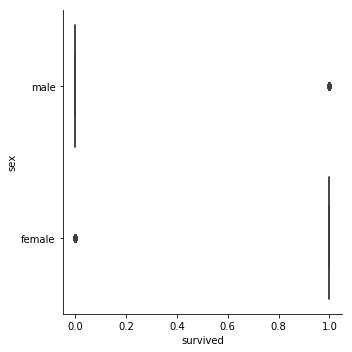

<Figure size 2160x432 with 0 Axes>

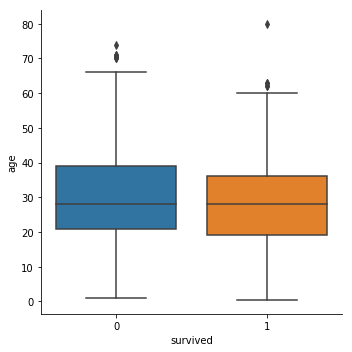

<Figure size 2160x432 with 0 Axes>

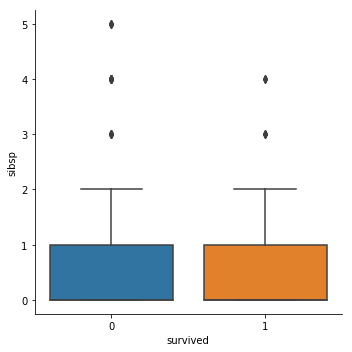

<Figure size 2160x432 with 0 Axes>

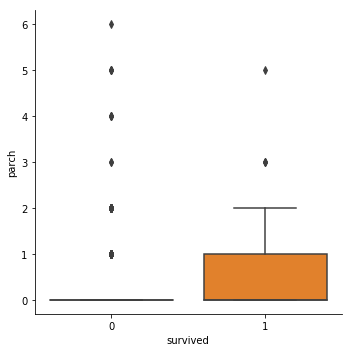

<Figure size 2160x432 with 0 Axes>

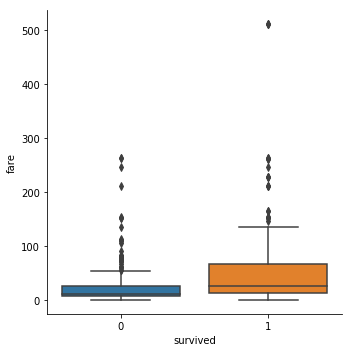


 x is pclass 
 


<Figure size 2160x432 with 0 Axes>

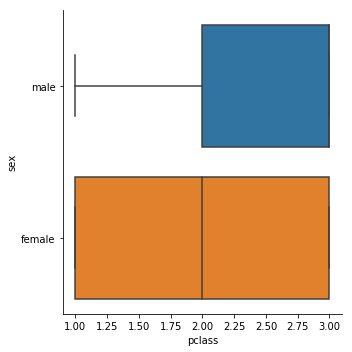

<Figure size 2160x432 with 0 Axes>

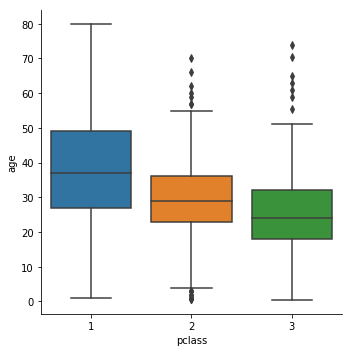

<Figure size 2160x432 with 0 Axes>

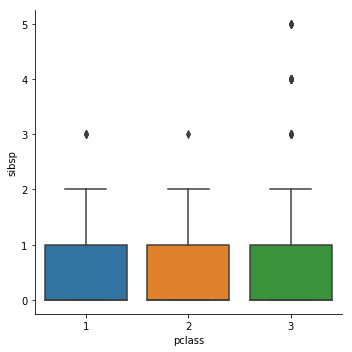

<Figure size 2160x432 with 0 Axes>

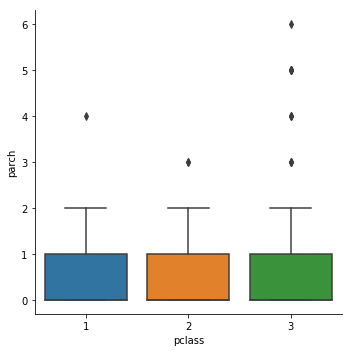

<Figure size 2160x432 with 0 Axes>

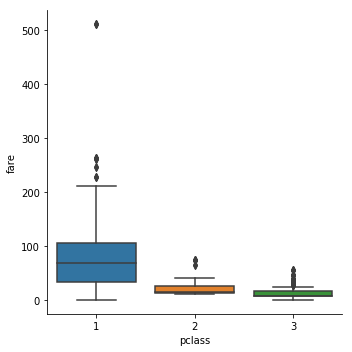


 x is sex 
 


<Figure size 2160x432 with 0 Axes>

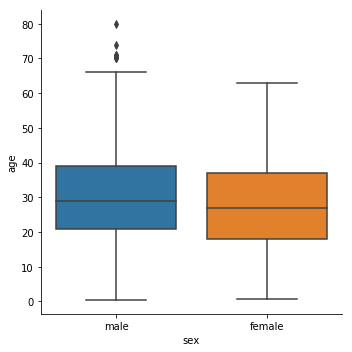

<Figure size 2160x432 with 0 Axes>

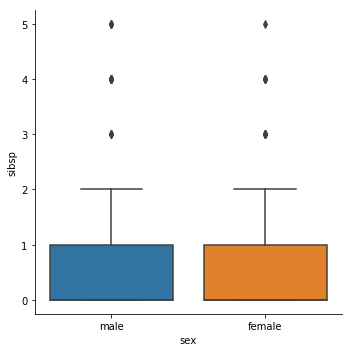

<Figure size 2160x432 with 0 Axes>

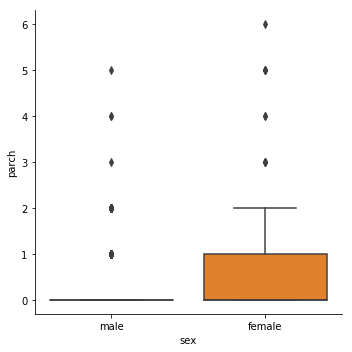

<Figure size 2160x432 with 0 Axes>

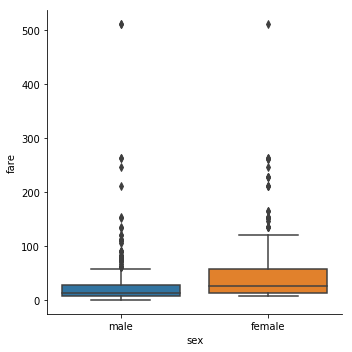


 x is age 
 


<Figure size 2160x432 with 0 Axes>

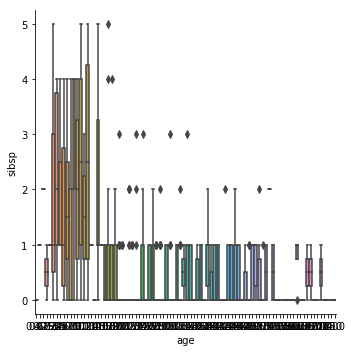

<Figure size 2160x432 with 0 Axes>

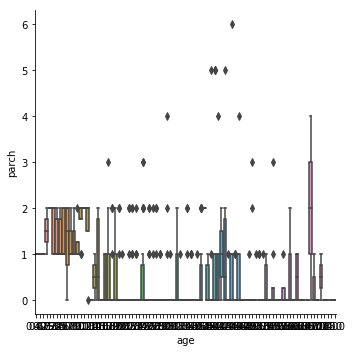

<Figure size 2160x432 with 0 Axes>

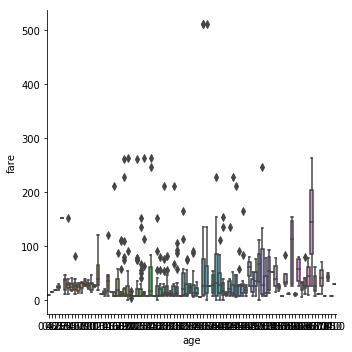


 x is sibsp 
 


<Figure size 2160x432 with 0 Axes>

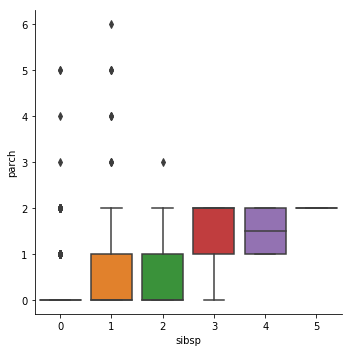

<Figure size 2160x432 with 0 Axes>

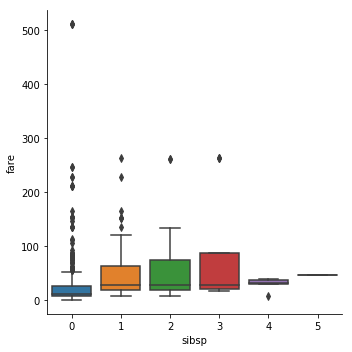


 x is parch 
 


<Figure size 2160x432 with 0 Axes>

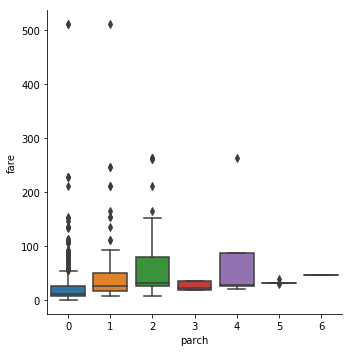


 x is fare 
 
Kind = violin 


 x is survived 
 


<Figure size 2160x432 with 0 Axes>

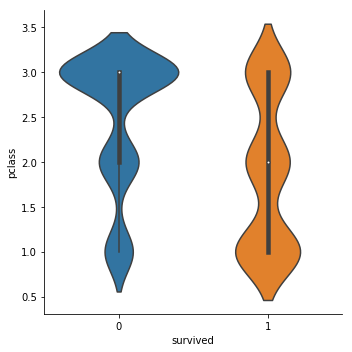

<Figure size 2160x432 with 0 Axes>

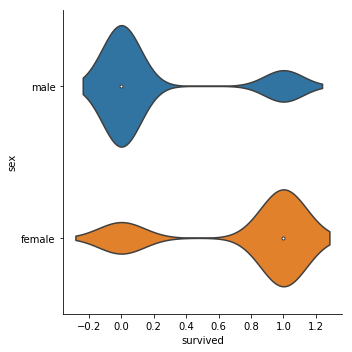

<Figure size 2160x432 with 0 Axes>

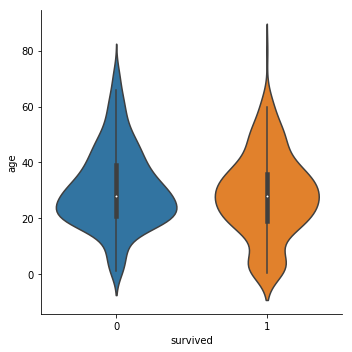

<Figure size 2160x432 with 0 Axes>

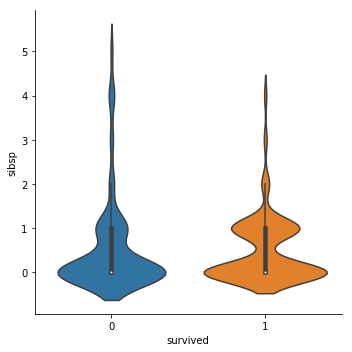

<Figure size 2160x432 with 0 Axes>

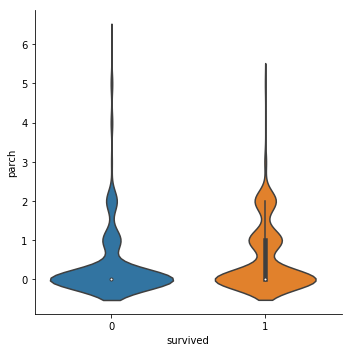

<Figure size 2160x432 with 0 Axes>

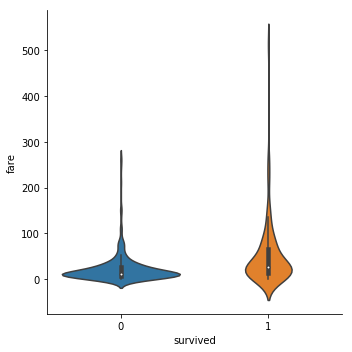


 x is pclass 
 


<Figure size 2160x432 with 0 Axes>

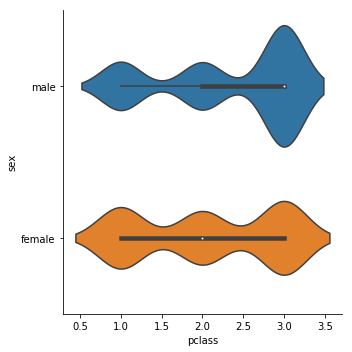

<Figure size 2160x432 with 0 Axes>

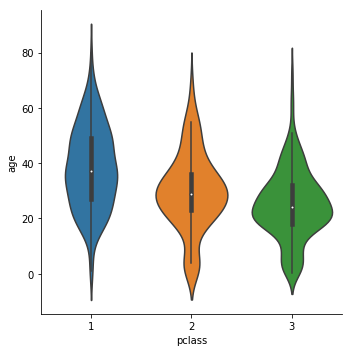

<Figure size 2160x432 with 0 Axes>

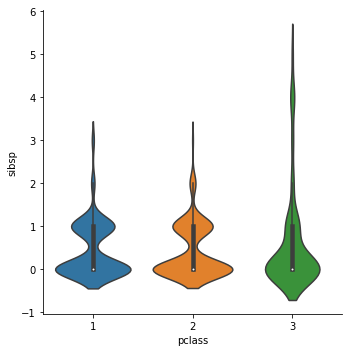

<Figure size 2160x432 with 0 Axes>

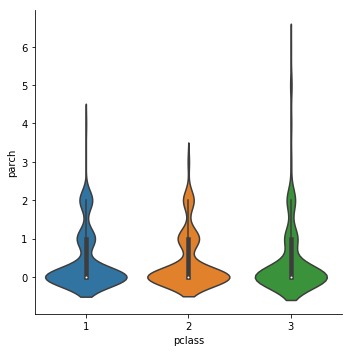

<Figure size 2160x432 with 0 Axes>

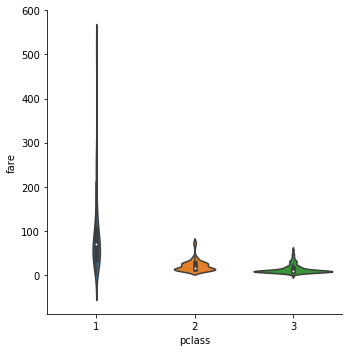


 x is sex 
 


<Figure size 2160x432 with 0 Axes>

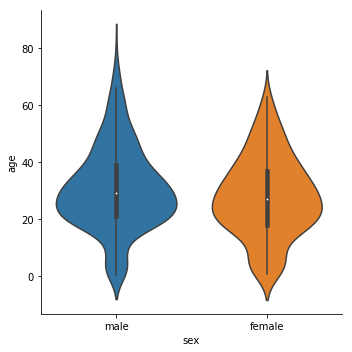

<Figure size 2160x432 with 0 Axes>

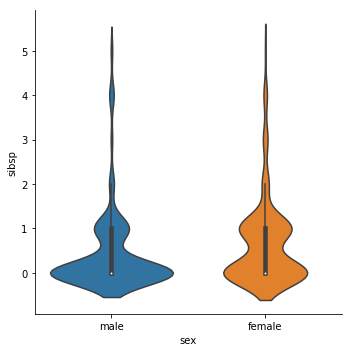

<Figure size 2160x432 with 0 Axes>

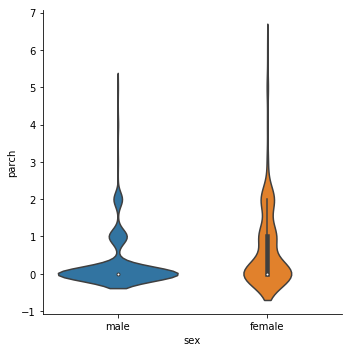

<Figure size 2160x432 with 0 Axes>

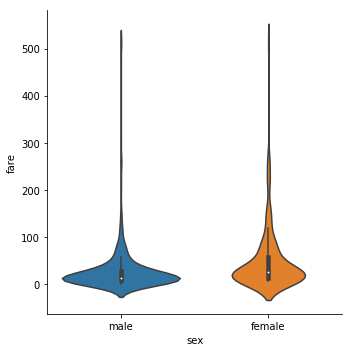


 x is age 
 


<Figure size 2160x432 with 0 Axes>

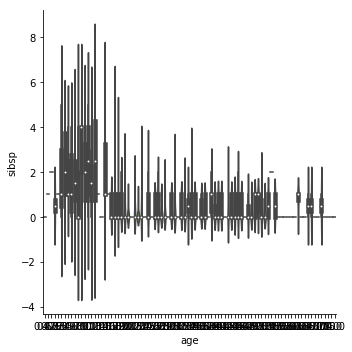

<Figure size 2160x432 with 0 Axes>

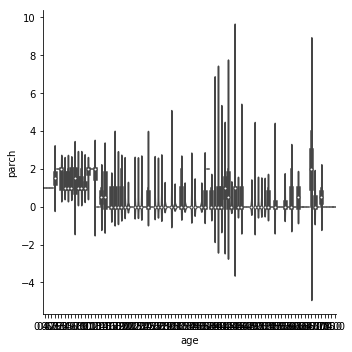

<Figure size 2160x432 with 0 Axes>

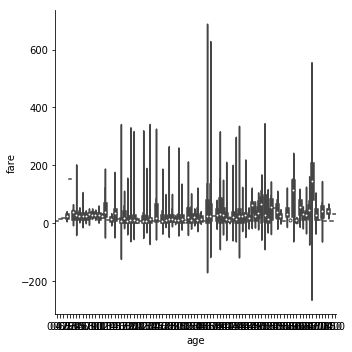


 x is sibsp 
 


<Figure size 2160x432 with 0 Axes>

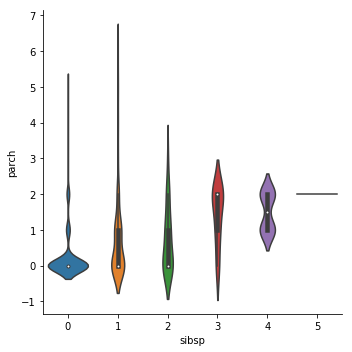

<Figure size 2160x432 with 0 Axes>

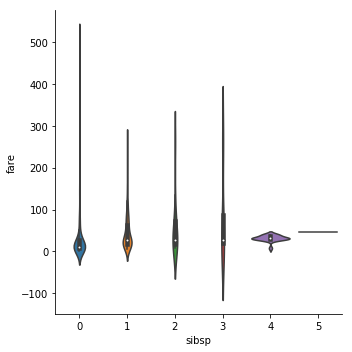


 x is parch 
 


<Figure size 2160x432 with 0 Axes>

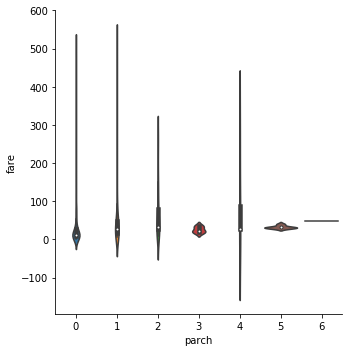


 x is fare 
 



 count == 126


In [0]:
kind = ['point', 'bar', 'strip', 'swarm', 'box', 'violin']
count = 0
for i in kind:
    x = list(df.columns)
    y = list(df.columns)
    print(f'Kind = {i} \n')
    for j in x:
        print(f'\n x is {j} \n ')
        for k in y:
            a = type(df[j][0])
            b = type(df[k][0])
            if j != k:
                if (a == np.float64 or a == np.int64) or (b == np.float64 or b == np.int64):
                    plt.figure(figsize = (30, 6))
                    sns.catplot(x = j, y = k, data = df, kind = i)
                    plt.show()
                    count += 1
        y.remove(j)


print(f'\n\n\n count == {count}')

In [0]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare'], dtype='object')

Kind = point 



<Figure size 2160x432 with 0 Axes>

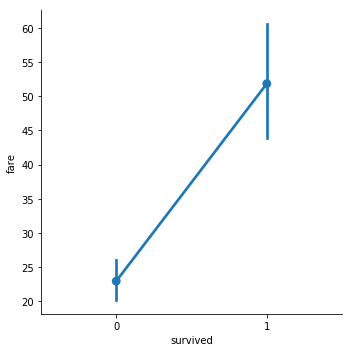

<Figure size 2160x432 with 0 Axes>

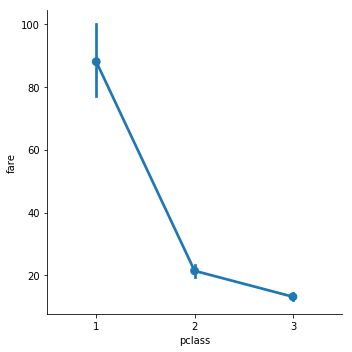

<Figure size 2160x432 with 0 Axes>

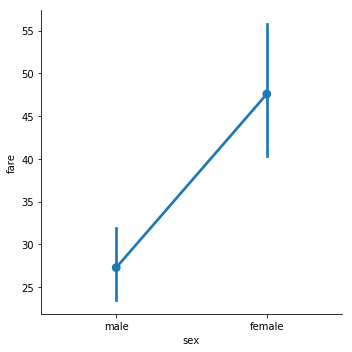

<Figure size 2160x432 with 0 Axes>

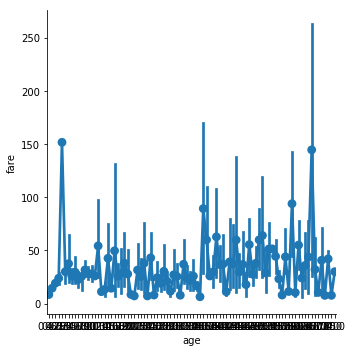

<Figure size 2160x432 with 0 Axes>

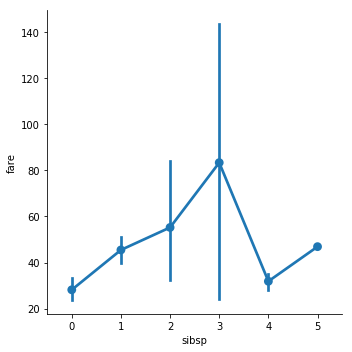

<Figure size 2160x432 with 0 Axes>

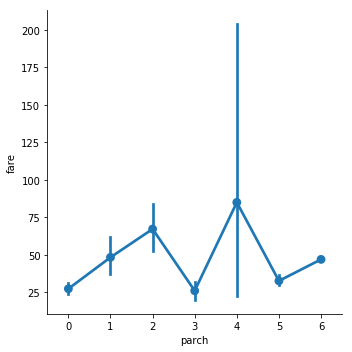

Kind = bar 



<Figure size 2160x432 with 0 Axes>

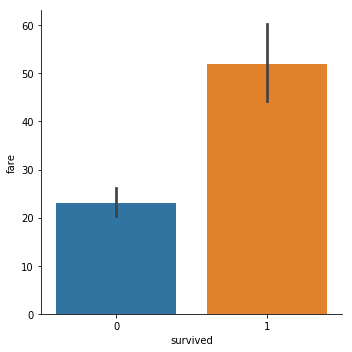

<Figure size 2160x432 with 0 Axes>

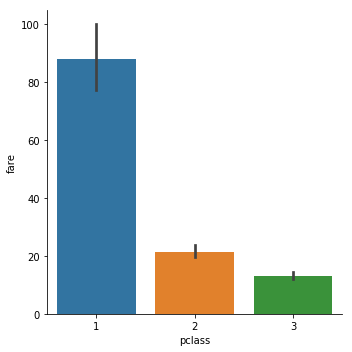

<Figure size 2160x432 with 0 Axes>

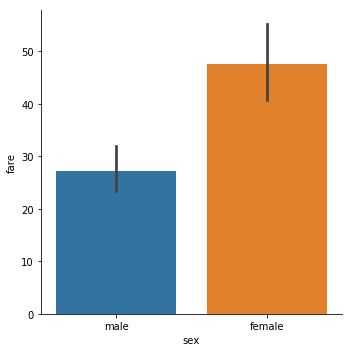

<Figure size 2160x432 with 0 Axes>

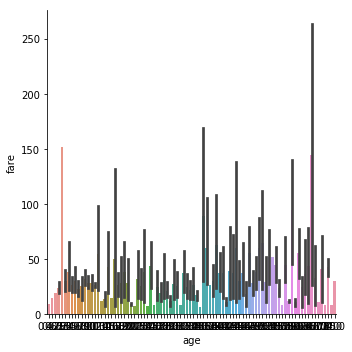

<Figure size 2160x432 with 0 Axes>

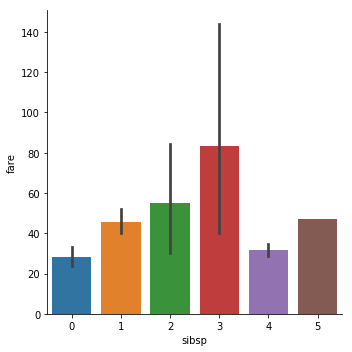

<Figure size 2160x432 with 0 Axes>

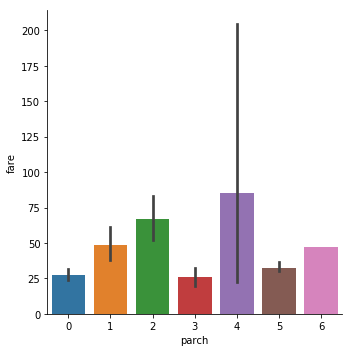

Kind = strip 



<Figure size 2160x432 with 0 Axes>

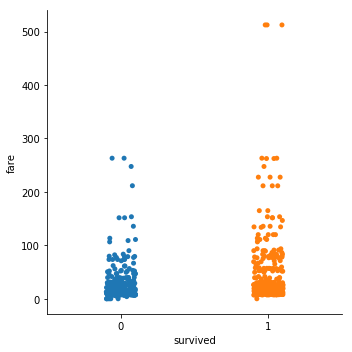

<Figure size 2160x432 with 0 Axes>

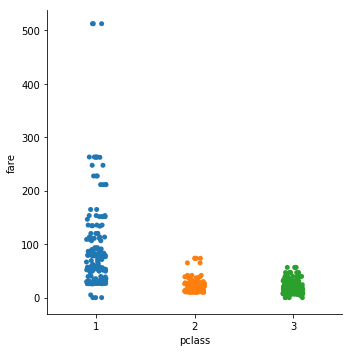

<Figure size 2160x432 with 0 Axes>

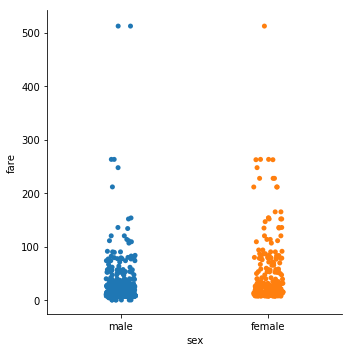

<Figure size 2160x432 with 0 Axes>

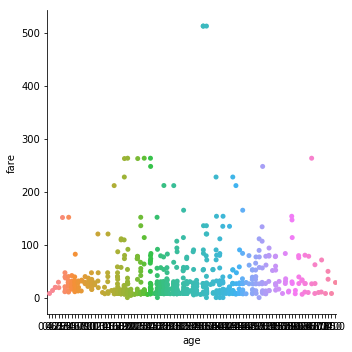

<Figure size 2160x432 with 0 Axes>

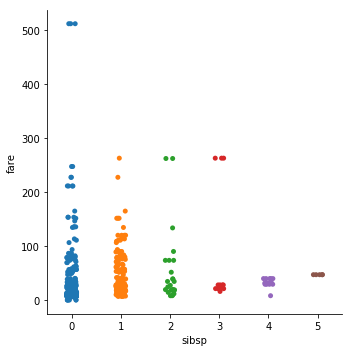

<Figure size 2160x432 with 0 Axes>

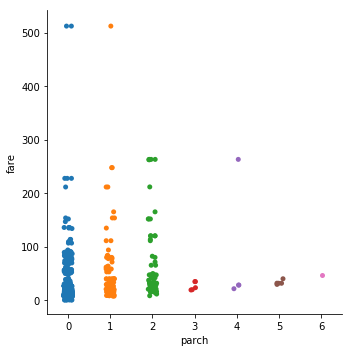

Kind = swarm 



<Figure size 2160x432 with 0 Axes>

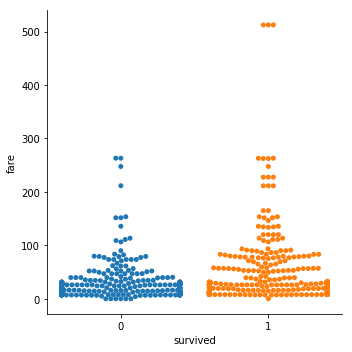

<Figure size 2160x432 with 0 Axes>

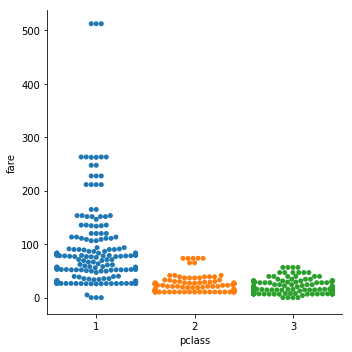

<Figure size 2160x432 with 0 Axes>

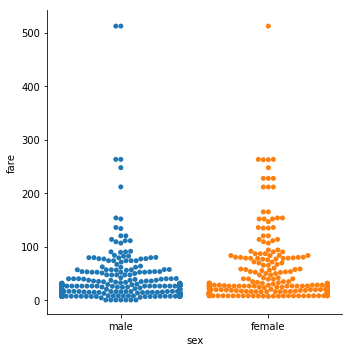

<Figure size 2160x432 with 0 Axes>

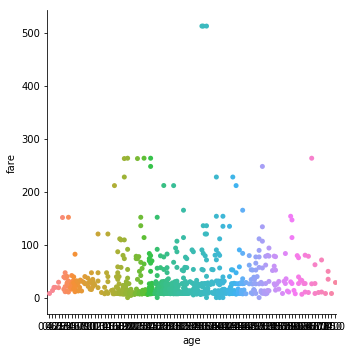

<Figure size 2160x432 with 0 Axes>

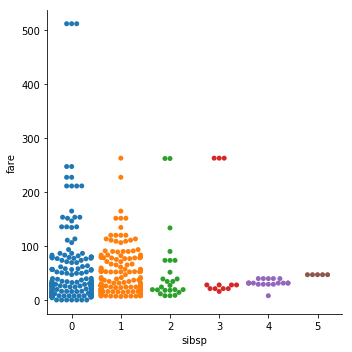

<Figure size 2160x432 with 0 Axes>

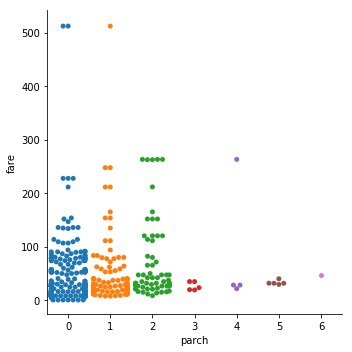

Kind = box 



<Figure size 2160x432 with 0 Axes>

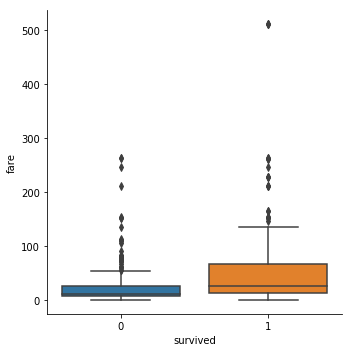

<Figure size 2160x432 with 0 Axes>

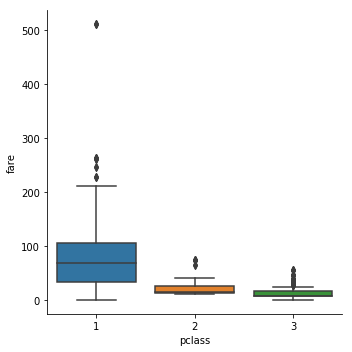

<Figure size 2160x432 with 0 Axes>

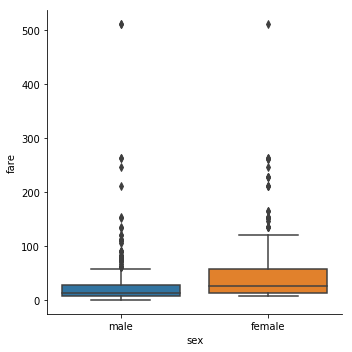

<Figure size 2160x432 with 0 Axes>

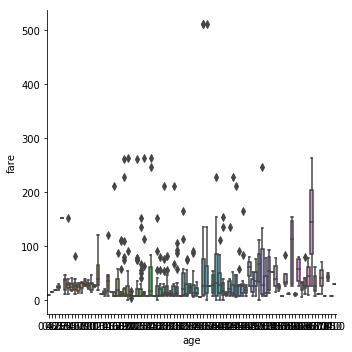

<Figure size 2160x432 with 0 Axes>

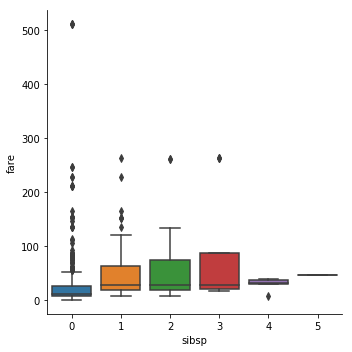

<Figure size 2160x432 with 0 Axes>

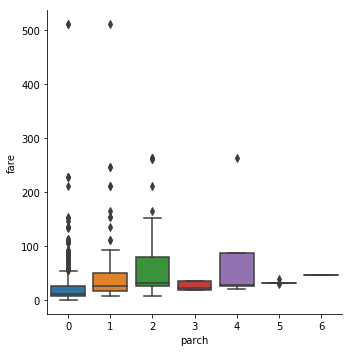

Kind = violin 



<Figure size 2160x432 with 0 Axes>

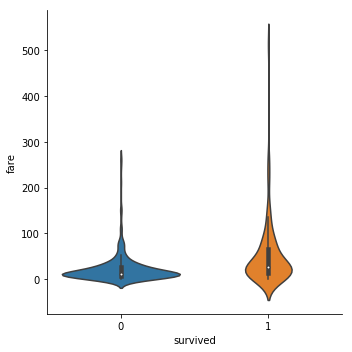

<Figure size 2160x432 with 0 Axes>

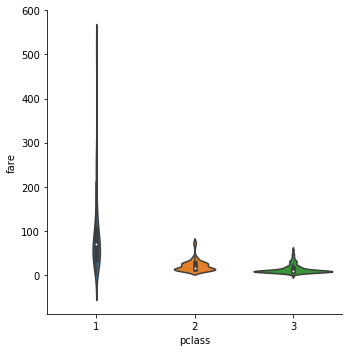

<Figure size 2160x432 with 0 Axes>

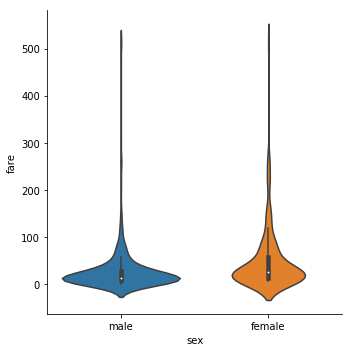

<Figure size 2160x432 with 0 Axes>

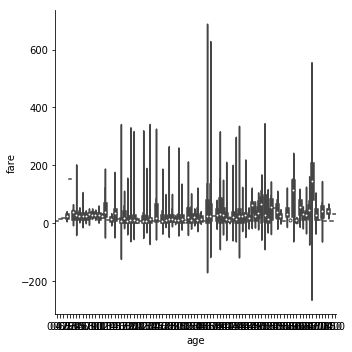

<Figure size 2160x432 with 0 Axes>

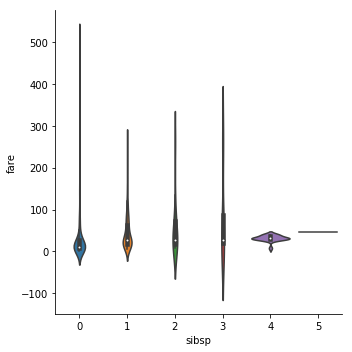

<Figure size 2160x432 with 0 Axes>

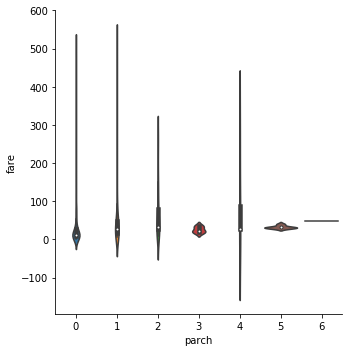




 count == 36


In [0]:
count = 0
x = df.columns
for i in kind:
    print(f'Kind = {i} \n')
    for j in x:
            a = type(df.age[0])
            b = type(df[j][0])
            if j != 'fare':
                if (a == np.float64 or a == np.int64) or (b == np.float64 or b == np.int64):
                    plt.figure(figsize = (30, 6))
                    sns.catplot(x = j, y = 'fare', data = df, kind = i, #hue = 'sex'
                               )
                    plt.show()
                    count += 1


print(f'\n\n\n count == {count}')